# Terry Stop Classification Model

A Terry Stop, also known as a "Stop, Question, and Frisk" or a "Stop and Frisk" is based on the Supreme Court case *Terry V. Ohio*. The court in Terry held that a stop and frisk must comply with the Fourth Amendment, meaning that the stop-and-frisk cannot be unreasonable.

![Stop and frisk](./data/th.jpg)

A reasonable stop-and-frisk is one in which a reasonably prudent office is endangered. He/she may make a reasonable search for weapons of the person believed by him to be armed and dangerous.

When an officer has a *reasonable suspicion* that an individual is armed, engaged in, or about to be engaged in criminal conduct, the office may briefly stop and detain an individual for a *pat-down*

In a traffic stop setting, the Terry condition of a lawful investigatory stop is met whenever it is lawful for the police to detain an automobile and its occupants pending inquiry into a vehicular violation. The police do not need to believe that any occupant of the vehicle is involved in criminal activity. The reasonable suspicion of criminal activities discovered during the traffic stop may give rise to a Terry stop.

# Business Problem & Stakeholders

 My stakeholder will be Civil rights attorneys within the city of seattle. The purpose of this project is to ensure adherence to civil rights best practices, we aim to identify and address the most problematic cases, legitimizing arrests. Providing valuable insights on the perfomance of Terry Stops, and if these stops led to a legitmate reason for arrests. 
 
 My goal is to develop a classification model to predict if an arrest occurred or it did not from a terry stop, distinguishing between cases that resulted in arrests and those that did not.

# Data understanding and preparation

Data regarding stops in the city of Seattle. The dataset contains roughly 61,000 rows, each pertaining to a stop made since 2015 to october 1, 2024 Seattle law enforcement.

## Exlporatory Data Analysis
We'll use a number of Datasets, Seattle PD and NYPD. We'll process the data and create a classification that will help predict whether an arrest was made after a Terry Stop.

We'll look at the info and description of the data

### Import the required Datasets and libraries

Dataset located:

https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8/about_data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import tree


#import the seattle PD data and print the first 5 rows
seattle_data = pd.read_csv("./data/Terry_Stops_20241018.csv")


seattle_data.head()

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
0           26 - 35           -1  20150000005870         101060   
1           26 - 35           -1  20150000089918          28823   
2                 -           -1  20180000078041         463764   
3      56 and Above  12770971382  20200000175799    13267969395   
4           26 - 35           -1  20160000108160         141119   

  Stop Resolution Weapon Type Officer ID  Officer YOB Officer Gender  \
0   Field Contact         NaN       4980         1962              F   
1          Arrest         NaN       5143         1957              M   
2          Arrest         NaN       6921         1978              M   
3          Arrest           -       7266         1976              M   
4  Offense Report         NaN       7288         1984              M   

                Officer Race  ...     Reported Time  \
0                      White  ...  15:12:00.0000000   
1  Black or African American  ...  19:13:00.0000000   
2                      Asian  ...  04:27:00.0000000   
3                      White  ...  11:17:19.0000000   
4                      White  ...  17:35:00.0000000   

                                  Initial Call Type  \
0                                                 -   
1          ROBBERY - CRITICAL (INCLUDES STRONG ARM)   
2                                          TRESPASS   
3                    ASLT - CRITICAL (NO SHOOTINGS)   
4  NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)   

                             Final Call Type Call Type  \
0                                          -         -   
1                     --ROBBERY - STRONG ARM       911   
2           --WARRANT SERVICES - MISDEMEANOR       911   
3                          --ASSAULTS, OTHER       911   
4  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE       911   

                          Officer Squad Arrest Flag Frisk Flag Precinct  \
0    WEST PCT 2ND W - QUEEN - PLATOON 1           N          N        -   
1                                   NaN           N          Y     East   
2  SOUTH PCT 3RD W - ROBERT - PLATOON 2           N          Y    South   
3     WEST PCT 1ST W - KING - PLATOON 1           Y          N     West   
4           EAST PCT 2ND W - E/G RELIEF           N          N     East   

  Sector Beat  
0      -    -  
1      C   C1  
2      R   R2  
3      K   K1  
4      E   E2  

[5 rows x 23 columns]

In [2]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61555 entries, 0 to 61554
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61555 non-null  object
 1   Subject ID                61555 non-null  int64 
 2   GO / SC Num               61555 non-null  int64 
 3   Terry Stop ID             61555 non-null  int64 
 4   Stop Resolution           61555 non-null  object
 5   Weapon Type               28990 non-null  object
 6   Officer ID                61555 non-null  object
 7   Officer YOB               61555 non-null  int64 
 8   Officer Gender            61555 non-null  object
 9   Officer Race              61555 non-null  object
 10  Subject Perceived Race    61555 non-null  object
 11  Subject Perceived Gender  61555 non-null  object
 12  Reported Date             61555 non-null  object
 13  Reported Time             61555 non-null  object
 14  Initial Call Type     

In [3]:
seattle_data.describe(include='all')

Subject Age Group    Subject ID   GO / SC Num  Terry Stop ID  \
count              61555  6.155500e+04  6.155500e+04   6.155500e+04   
unique                 7           NaN           NaN            NaN   
top              26 - 35           NaN           NaN            NaN   
freq               20559           NaN           NaN            NaN   
mean                 NaN  7.514672e+09  2.018711e+13   1.258517e+10   
std                  NaN  1.307486e+10  8.549706e+10   1.800415e+10   
min                  NaN -8.000000e+00 -1.000000e+00   2.802000e+04   
25%                  NaN -1.000000e+00  2.017000e+13   2.413675e+05   
50%                  NaN -1.000000e+00  2.018000e+13   5.132840e+05   
75%                  NaN  7.755940e+09  2.021000e+13   2.040625e+10   
max                  NaN  6.008468e+10  2.024000e+13   6.008639e+10   

       Stop Resolution Weapon Type Officer ID   Officer YOB Officer Gender  \
count            61555       28990      61555  61555.000000          61555   
unique               5          22       1391           NaN              3   
top      Field Contact           -       7456           NaN              M   
freq             29927       25072        532           NaN          54523   
mean               NaN         NaN        NaN   1984.135976            NaN   
std                NaN         NaN        NaN      9.467342            NaN   
min                NaN         NaN        NaN   1900.000000            NaN   
25%                NaN         NaN        NaN   1979.000000            NaN   
50%                NaN         NaN        NaN   1986.000000            NaN   
75%                NaN         NaN        NaN   1991.000000            NaN   
max                NaN         NaN        NaN   2002.000000            NaN   

       Officer Race  ...     Reported Time Initial Call Type Final Call Type  \
count         61555  ...             61555             61555           61555   
unique           13  ...             24063               182             199   
top           White  ...  03:09:00.0000000                 -               -   
freq          43980  ...                52             13494           13494   
mean            NaN  ...               NaN               NaN             NaN   
std             NaN  ...               NaN               NaN             NaN   
min             NaN  ...               NaN               NaN             NaN   
25%             NaN  ...               NaN               NaN             NaN   
50%             NaN  ...               NaN               NaN             NaN   
75%             NaN  ...               NaN               NaN             NaN   
max             NaN  ...               NaN               NaN             NaN   

       Call Type                    Officer Squad Arrest Flag Frisk Flag  \
count      61555                            60994       61555      61555   
unique         8                              272           2          3   
top          911  TRAINING - FIELD TRAINING SQUAD           N          N   
freq       29055                             6553       54851      46322   
mean         NaN                              NaN         NaN        NaN   
std          NaN                              NaN         NaN        NaN   
min          NaN                              NaN         NaN        NaN   
25%          NaN                              NaN         NaN        NaN   
50%          NaN                              NaN         NaN        NaN   
75%          NaN                              NaN         NaN        NaN   
max          NaN                              NaN         NaN        NaN   

       Precinct Sector   Beat  
count     61555  61555  61555  
unique        9     20     55  
top        West      -      -  
freq      17085  10795  10789  
mean        NaN    NaN    NaN  
std         NaN    NaN    NaN  
min         NaN    NaN    NaN  
25%         NaN    NaN    NaN  
50%         NaN    NaN    NaN  
75%         NaN    NaN 

The dataset shows that majority of the data are identified as objects, and the data identified as an int dtype does nto provide information for the dataset. We will need to impute and One-hot encode the certain features.

First, we will check for any missing data within the dataset.

In [4]:
seattle_data.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

Although the data presents only two columns that seem to have missing values. In our initial inspection of the dataset, we can see that there are more that two columns that have missing values. We'll identify the number of unique values per column.

In [5]:
print(seattle_data.nunique())

Subject Age Group               7
Subject ID                  17255
GO / SC Num                 49330
Terry Stop ID               61450
Stop Resolution                 5
Weapon Type                    22
Officer ID                   1391
Officer YOB                    56
Officer Gender                  3
Officer Race                   13
Subject Perceived Race         11
Subject Perceived Gender        7
Reported Date                3504
Reported Time               24063
Initial Call Type             182
Final Call Type               199
Call Type                       8
Officer Squad                 272
Arrest Flag                     2
Frisk Flag                      3
Precinct                        9
Sector                         20
Beat                           55
dtype: int64


In [6]:
seattle_data['Weapon Type'].value_counts()

Weapon Type
-                                       25072
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument        1356
Handgun                                   401
Blunt Object/Striking Implement           180
Firearm                                   114
Firearm Other                             100
Other Firearm                              78
Mace/Pepper Spray                          57
Club, Blackjack, Brass Knuckles            49
Taser/Stun Gun                             20
None/Not Applicable                        20
Firearm (unk type)                         15
Fire/Incendiary Device                     13
Rifle                                      11
Club                                        9
Shotgun                                     6
Personal Weapons (hands, feet, etc.)        2
Automatic Handgun                           2
Brass Knuckles                              1
Blackjack                                   1
Poison                

The weapons columns shows a 'None/Not applivable' column. suggesting that there was no weapons reported on that individual. 

There's also a '-' category, representing null values, either the weapon couldn't be identified or the individual had an object that was considered a weapon but not identified as something lethal, or that can cause harm.


Based on the dataset description, "Arrest Flag" indicates whether a "physical arrest" was made during the Terry Stop. We'll use this as our target.

In [7]:
seattle_data['Arrest Flag'].value_counts()

Arrest Flag
N    54851
Y     6704
Name: count, dtype: int64

In [8]:
print('Arrest Flag')
print('=======================')
seattle_data['Arrest Flag'].value_counts(normalize=True)

Arrest Flag


Arrest Flag
N    0.891089
Y    0.108911
Name: proportion, dtype: float64

There's a big imbalance within the target, with a ratio of **9:1**, for every 9 stops, 1 individual is arrested. we will keep this inmind when checking the performance of the dataset.

"Arrest Flag" column provides a binary classification, but it needs to be encoded. I also noticed an imbalance in the target. We'll tackle this later on. Let's identify any missing values in the series.

In [9]:
print(seattle_data['Arrest Flag'].isnull().sum())


0


In [10]:
value_counts = seattle_data[['Stop Resolution', 'Frisk Flag', 'Arrest Flag']].value_counts(normalize=True) * 100

print(f'Arrest percentage based on Stop Resolution\n')
for index, percentage in value_counts.items():
    
    print(f"{index}: {round(percentage, 2)}%")

Arrest percentage based on Stop Resolution

('Field Contact', 'N', 'N'): 39.17%
('Offense Report', 'N', 'N'): 19.28%
('Field Contact', 'Y', 'N'): 9.1%
('Arrest', 'N', 'N'): 8.75%
('Arrest', 'N', 'Y'): 6.87%
('Offense Report', 'Y', 'N'): 6.11%
('Arrest', 'Y', 'N'): 4.41%
('Arrest', 'Y', 'Y'): 4.02%
('Referred for Prosecution', 'N', 'N'): 0.9%
('Field Contact', '-', 'N'): 0.35%
('Citation / Infraction', 'N', 'N'): 0.28%
('Referred for Prosecution', 'Y', 'N'): 0.26%
('Offense Report', '-', 'N'): 0.23%
('Arrest', '-', 'N'): 0.18%
('Citation / Infraction', 'Y', 'N'): 0.07%
('Referred for Prosecution', '-', 'N'): 0.02%
('Citation / Infraction', '-', 'N'): 0.0%
('Referred for Prosecution', 'N', 'Y'): 0.0%


## Simple Descriptive VIsualizations

We'll perform some simple visualizations to start to get an idea of the data provided.

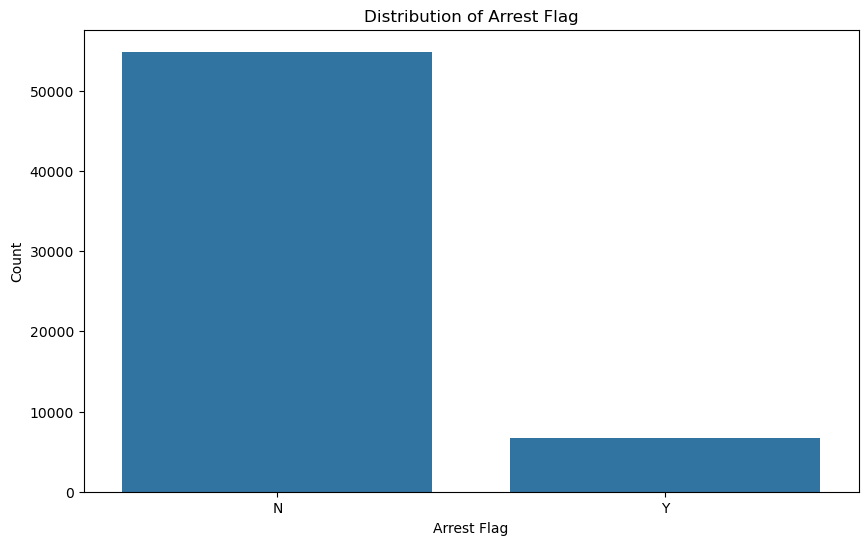

In [11]:
# Plot for Arrest Flag
plt.figure(figsize=(10, 6))
sns.countplot(data=seattle_data, x='Arrest Flag')
plt.title("Distribution of Arrest Flag")
plt.xlabel("Arrest Flag")
plt.ylabel("Count")
plt.savefig('./images/Distribution_of_arrests.png')
plt.show()


This shows the count of each class in Arrest Flag. A large difference in counts between classes indicates an imbalance.

In [12]:
arrest_data = seattle_data[seattle_data['Arrest Flag'] == 'Y']
arrest_data

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
3          56 and Above  12770971382  20200000175799    13267969395   
13              26 - 35   7727677416  20200000162912    13175704162   
35              18 - 25  31629644948  20220000135691    34067259361   
38              26 - 35  56845206186  20240000196562    57680658476   
55              36 - 45   7704469768  20190000454001    12034401373   
...                 ...          ...             ...            ...   
61527           18 - 25  34603052213  20220000170465    34603243727   
61532           26 - 35   7735857164  20210000284684    29319133500   
61533           18 - 25   7741755512  20240000210107    57961741719   
61542           36 - 45   7728211859  20210000118981    24057502078   
61545            1 - 17   7734306609  20200000035848    12498646415   

      Stop Resolution                      Weapon Type Officer ID  \
3              Arrest                                -       7266   
13             Arrest                                -       8644   
35             Arrest                                -       8554   
38             Arrest                                -       8874   
55             Arrest                                -       8626   
...               ...                              ...        ...   
61527          Arrest  Blunt Object/Striking Implement       8377   
61532          Arrest                                -       8768   
61533          Arrest                   Taser/Stun Gun       8897   
61542          Arrest                                -       8633   
61545          Arrest                                -       7603   

       Officer YOB Officer Gender               Officer Race  ...  \
3             1976              M                      White  ...   
13            1995              M          Two or More Races  ...   
35            1990              M                      White  ...   
38            1998              M                   Hispanic  ...   
55            1992              M                      White  ...   
...            ...            ...                        ...  ...   
61527         1983              M                      White  ...   
61532         1988              M                      Asian  ...   
61533         1987              M                      White  ...   
61542         1988              M  Black or African American  ...   
61545         1977              M                      White  ...   

          Reported Time                             Initial Call Type  \
3      11:17:19.0000000                ASLT - CRITICAL (NO SHOOTINGS)   
13     22:29:44.0000000                                      TRESPASS   
35     09:38:37.0000000                            ASLT - DV CRITICAL   
38     01:36:07.0000000                     DISTURBANCE - DV CRITICAL   
55     10:56:31.0000000                 FIGHT - CRITICAL WITH WEAPONS   
...                 ...                                           ...   
61527  16:57:43.0000000                                   DISTURBANCE   
61532  00:05:08.0000000  ORDER - CRITICAL VIOLATION OF DV COURT ORDER   
61533  05:21:37.0000000     THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)   
61542  15:25:28.0000000                          BURG - OCCUPIED RESD   
61545  20:50:54.0000000                       WARRANT - FELONY PICKUP   

                                    Final Call Type                 Call Type  \
3                                 --ASSAULTS, OTHER                       911   
13                             --PROWLER - TRESPASS  TELEPHONE OTHER, NOT 911   
35        --DV - ARGUMENTS, DISTURBANCE (NO ARREST)                       911   
38     --DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)                       911   
55                                --ASSAULTS, OTHER                    ONVIEW   
...                                             ...                       ...   
61527                         --DISTURBANCE - OTHER

In [117]:
arrest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 3 to 61545
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         6704 non-null   object
 1   Subject ID                6704 non-null   int64 
 2   GO / SC Num               6704 non-null   int64 
 3   Terry Stop ID             6704 non-null   int64 
 4   Stop Resolution           6704 non-null   object
 5   Weapon Type               6704 non-null   object
 6   Officer ID                6704 non-null   object
 7   Officer YOB               6704 non-null   int64 
 8   Officer Gender            6704 non-null   object
 9   Officer Race              6704 non-null   object
 10  Subject Perceived Race    6704 non-null   object
 11  Subject Perceived Gender  6704 non-null   object
 12  Reported Date             6704 non-null   object
 13  Reported Time             6704 non-null   object
 14  Initial Call Type         67

I filtered the dataset to reflect cases that led to an arrest, but what cases are considered to be officer initiated stops, and what cases are calls into the department?

In [13]:
# print(arrest_data['Initial Call Type'].unique())b
for value in arrest_data['Initial Call Type']:
    print(value)


ASLT - CRITICAL (NO SHOOTINGS)
TRESPASS
ASLT - DV CRITICAL
DISTURBANCE - DV CRITICAL
FIGHT - CRITICAL WITH WEAPONS
LEWD -  (EXPOSING, FLASHING)
WARRANT PICKUP - FROM OTHER AGENCY
THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT
ASLT - PERSON SHOT OR SHOT AT
-
FIGHT - PHYSICAL (NO WEAPONS)
DISTURBANCE - DV - NO ASLT
BURG - OCCUPIED RESD
OBS - MVC - WITH INJURIES (INCLUDES HIT AND RUN)
ROBBERY - CRITICAL (INCLUDES STRONG ARM)
OBS - MVC - WITH INJURIES (INCLUDES HIT AND RUN)
ROBBERY - CRITICAL (INCLUDES STRONG ARM)
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY
AUTO RECOVERY
AUTO RECOVERY
AUTO THEFT - VEH THEFT OR THEFT AND RECOVERY
THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)
-
TRESPASS
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT
OBS - BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS)
ROBBERY - CRITICAL (INCLUDES STRONG ARM)
ASLT - CRITICAL (NO SHOOTINGS)
AUTO RECOVERY
OBS - MVC - WITH INJURIES (INCLUDES HIT AND RUN)
BURG - OCCUPIED RESD
PERSON IN BEHAVIORAL/EMO

I'll filter within the arrest data to reflect whether stop was initiated by an officer, that led to an arrest.

In [14]:
# Looking at the data I want to filter Suspicious stops that led to an arrest

suspicious_arrest_rows = arrest_data[arrest_data['Initial Call Type'].str.contains('SUSPICIOUS', case=False, na=False)]
suspicious_arrest_rows

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
79              46 - 55   7728281151  20190000327584    10046252491   
242             26 - 35  33402572267  20200000113510    12805603402   
446             36 - 45  11714916991  20200000073624    12662034397   
457              1 - 17  53074543169  20230000329931    53262900808   
498             26 - 35  12784209788  20200000101590    12784279732   
...                 ...          ...             ...            ...   
61083           18 - 25   7731779543  20240000108547    55642068980   
61239           26 - 35  32001437838  20240000044413    54205687769   
61255           36 - 45  33158952022  20190000416453    11695361924   
61326           36 - 45  12795682334  20200000037553    12595508451   
61494           26 - 35  13074975602  20230000158754    50969336645   

      Stop Resolution Weapon Type Officer ID  Officer YOB Officer Gender  \
79             Arrest           -       7758         1987              M   
242            Arrest           -       8556         1995              M   
446            Arrest           -       8404         1984              M   
457            Arrest           -       8725         1987              M   
498            Arrest           -       8486         1992              M   
...               ...         ...        ...          ...            ...   
61083          Arrest     Handgun       8725         1987              M   
61239          Arrest           -       8854         1976              M   
61255          Arrest           -       7456         1979              M   
61326          Arrest           -       8615         1987              M   
61494          Arrest     Handgun       8769         1995              M   

             Officer Race  ...     Reported Time  \
79                  White  ...  11:25:41.0000000   
242                 White  ...  11:53:54.0000000   
446                 White  ...  20:04:39.0000000   
457                 White  ...  12:34:11.0000000   
498                 Asian  ...  16:48:27.0000000   
...                   ...  ...               ...   
61083               White  ...  19:18:43.0000000   
61239               White  ...  14:21:55.0000000   
61255               White  ...  13:22:14.0000000   
61326            Hispanic  ...  03:32:05.0000000   
61494  Declined to Answer  ...  09:33:34.0000000   

                                Initial Call Type  \
79        SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
242       SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
446       SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
457       SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
498    SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
...                                           ...   
61083  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
61239  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
61255     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61326     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61494     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   

                                    Final Call Type Call Type  \
79     --DV - ENFORCE COURT ORDER (ARREST MANDATED)    ONVIEW   
242                             --THEFT - CAR PROWL       911   
446                     --WARRANT SERVICES - FELONY    ONVIEW   
457                      --AUTOMOBILES - AUTO THEFT       911   
498        --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   
...                                             ...       ...   
61083                   --WEAPON, PERSON WITH - GUN    ONVIEW   
61239                     --NARCOTICS - NARS REPORT    ONVIEW   
61255                   --WARRANT SERVICES - FELONY    ONVIEW   
61326             --BURGLARY - RESIDENTIAL OCCUPIED       911   
61494     --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   

                                       Officer Squad Arrest Flag Frisk Flag  \
79             EAST PCT 1ST W - E/G RELIEF (CHARLIE)           Y          N   
242               WEST PCT 1ST W - DAVI

What classifies Suspicious activity? What factors play into someone falling under the scope of suspicion or suspicious activity?

In [15]:
# print(arrest_data['Final Call Type'].unique())
for values in arrest_data['Final Call Type']:
    print(values)

--ASSAULTS, OTHER
--PROWLER - TRESPASS
--DV - ARGUMENTS, DISTURBANCE (NO ARREST)
--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)
--ASSAULTS, OTHER
--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT
--WARRANT SERVICES - MISDEMEANOR
--ASSAULTS - HARASSMENT, THREATS
--DV - ENFORCE COURT ORDER (ARREST MANDATED)
--ASSAULTS - HARASSMENT, THREATS
-
--ASSAULTS, OTHER
--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)
--BURGLARY - RESIDENTIAL, UNOCCUPIED
--TRAFFIC - D.U.I.
--ROBBERY - ARMED
--NARCOTICS - OTHER
--ASSAULTS - HARASSMENT, THREATS
--PREMISE CHECKS - CRIME PREVENTION
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE
--AUTOMOBILES - RECOVERY (THEFT)
--AUTOMOBILES - AUTO THEFT
--ASSAULTS - HARASSMENT, THREATS
-
--PROWLER - TRESPASS
--THEFT - CAR PROWL
--BURGLARY - NON RESIDENTIAL/COMMERCIAL
--ROBBERY - STRONG ARM
--HOMICIDE
--AUTOMOBILES - RECOVERY (THEFT)
--TRAFFIC - D.U.I.
--BURGLARY - UNOCC STRUC ON RESN PROP
--WARRANT SERVICES - FELONY
--ROBBERY - STRONG ARM
--THEFT - SHOPLIFT
--THEFT - ALL OTHER
--ASSAULTS 

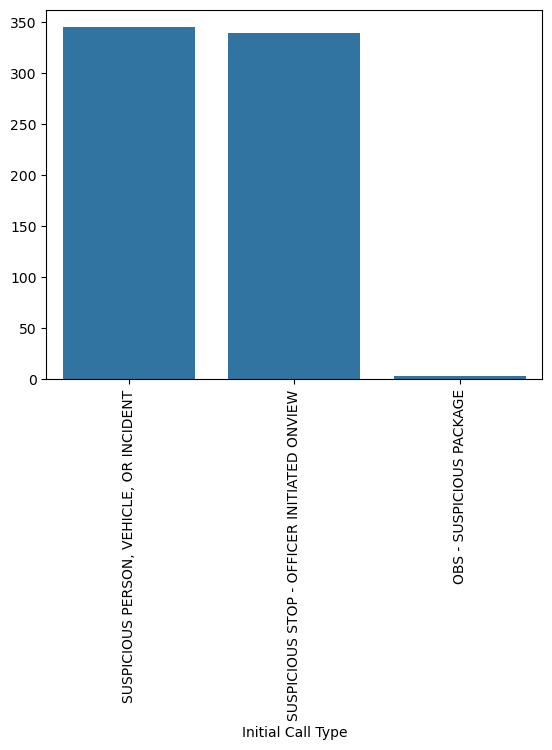

In [16]:
cur_values = suspicious_arrest_rows['Initial Call Type'].value_counts()


sns.barplot(x=cur_values.index, y=cur_values.values)
plt.xticks(rotation=90)
plt.show()

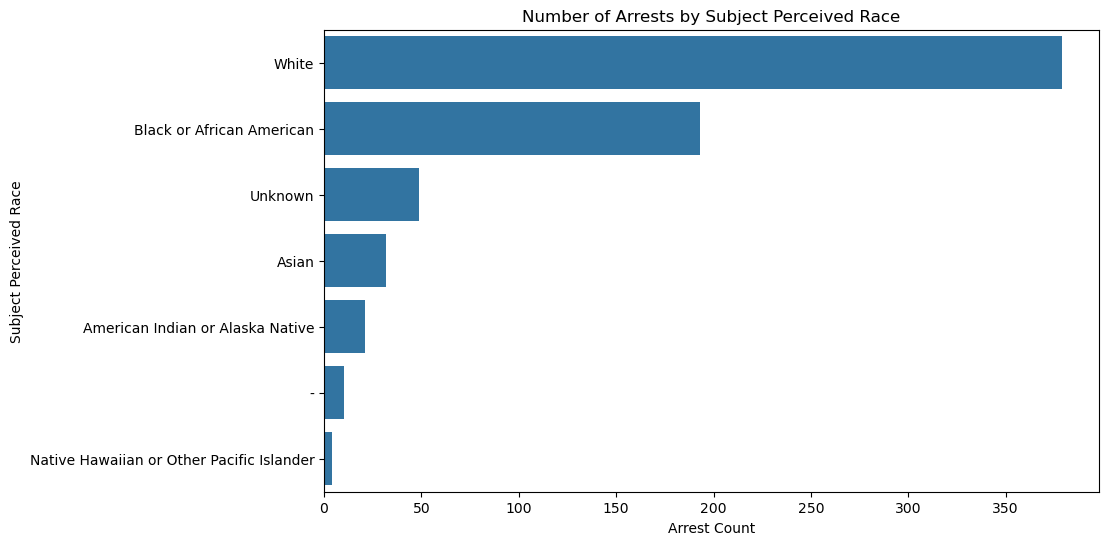

In [17]:
# Plot arrests by race
plt.figure(figsize=(10, 6))
sns.countplot(y="Subject Perceived Race", data=suspicious_arrest_rows, order=suspicious_arrest_rows["Subject Perceived Race"].value_counts().index)
plt.title("Number of Arrests by Subject Perceived Race")
plt.xlabel("Arrest Count")
plt.ylabel("Subject Perceived Race")
plt.show()

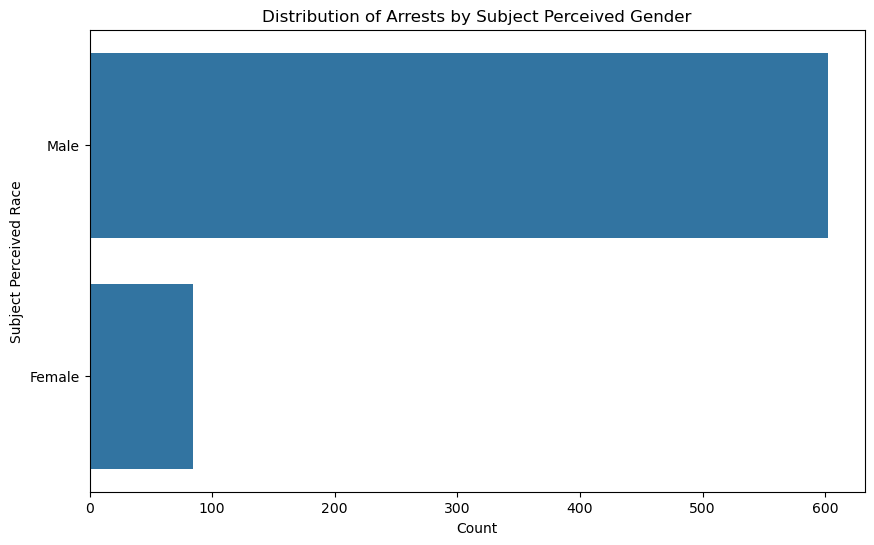

In [18]:
# Filter the data to include only "M" and "F"
filtered_data = suspicious_arrest_rows[suspicious_arrest_rows["Subject Perceived Gender"].isin(["Male", "Female"])]

plt.figure(figsize=(10, 6))
sns.countplot(y="Subject Perceived Gender", data=filtered_data, order=filtered_data["Subject Perceived Gender"].value_counts().index)
plt.title("Distribution of Arrests by Subject Perceived Gender")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.savefig('./images/Count_of_arrests_by_subject_percevied_gender')
plt.show()

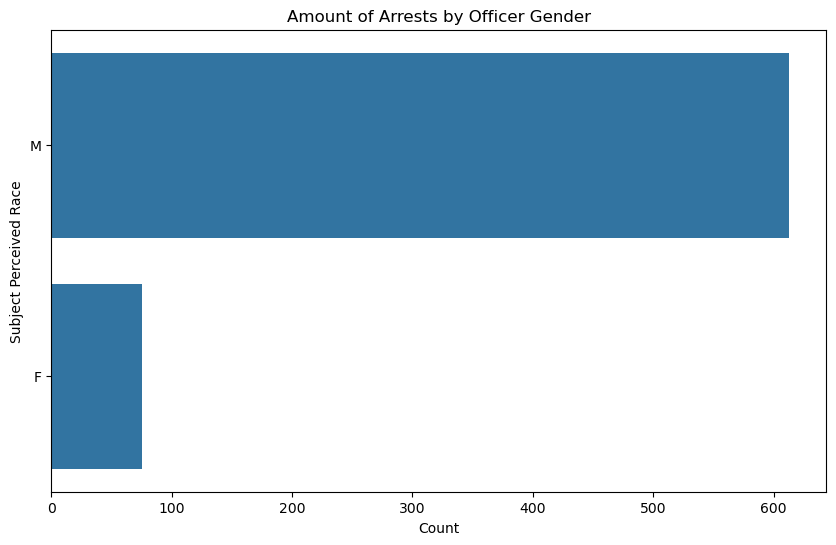

In [19]:
# Filter the data to include only "M" and "F"
filtered_data = suspicious_arrest_rows[suspicious_arrest_rows["Officer Gender"].isin(["M", "F"])]

# Plot arrests by race
plt.figure(figsize=(10, 6))
sns.countplot(y="Officer Gender", data=suspicious_arrest_rows, order=suspicious_arrest_rows["Officer Gender"].value_counts().index)
plt.title("Amount of Arrests by Officer Gender")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.savefig('./images/Count_of_arrests_by_officer_gender')
plt.show()

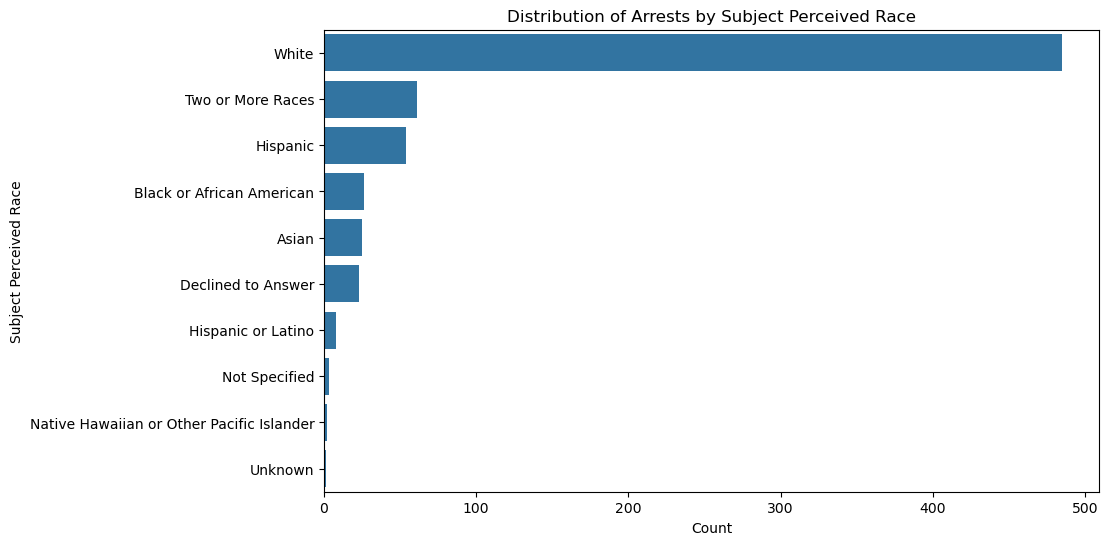

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Officer Race", data=suspicious_arrest_rows, order=suspicious_arrest_rows["Officer Race"].value_counts().index)
plt.title("Distribution of Arrests by Subject Perceived Race")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.savefig('./images/Count_of_arrests_by_subject_percevied_race')
plt.show()

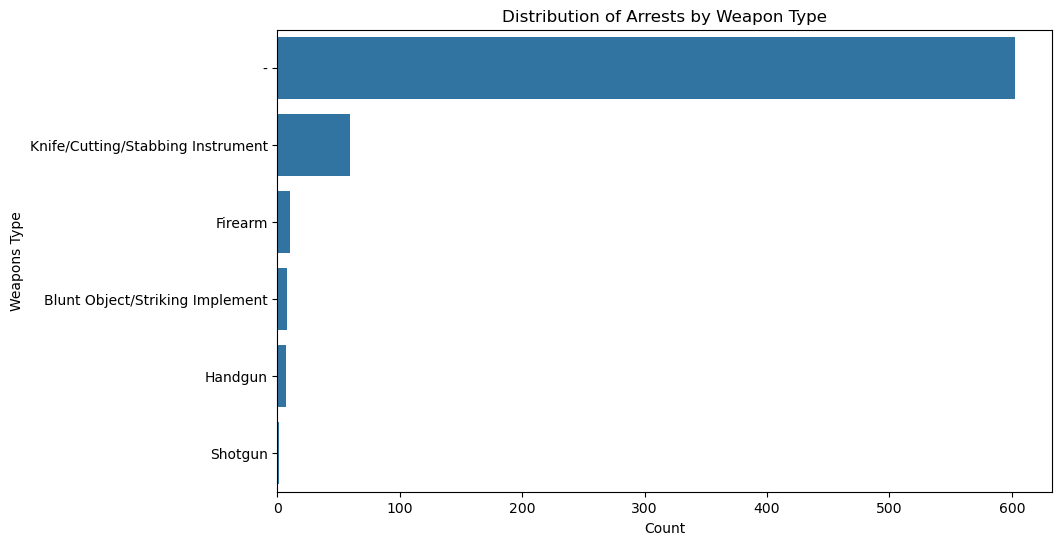

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Weapon Type", data=suspicious_arrest_rows, order=suspicious_arrest_rows["Weapon Type"].value_counts().index)
plt.title("Distribution of Arrests by Weapon Type")
plt.xlabel("Count")
plt.ylabel("Weapons Type")
plt.show()

Let's perform the same analysis on the seattle data. Narrowing the type of incident down to Suspcious activity that led to Officer stops 

In [ ]:
seattle_data_copy = seattle_data.copy()
suspicious_rows = seattle_data_copy[seattle_data_copy['Initial Call Type'].str.contains('SUSPICIOUS')]
suspicious_rows

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
10              46 - 55   7729104232  20190000307817     9738671045   
17              26 - 35           -1  20150000268950          69904   
21              46 - 55           -1  20170000235259         280796   
26              36 - 45           -1  20180000027304         381991   
28              18 - 25           -1  20170000160027         262136   
...                 ...          ...             ...            ...   
61518           18 - 25           -1  20160000065750         131490   
61530                 -           -1  20230000180196    51136054624   
61534           36 - 45  41526067949  20230000035588    41525937507   
61552           46 - 55   7730411376  20190000291454     9639449799   
61553           36 - 45   8516362629  20210000261258    27909435581   

      Stop Resolution    Weapon Type Officer ID  Officer YOB Officer Gender  \
10      Field Contact              -       8538         1994              M   
17             Arrest  Firearm Other       7472         1981              M   
21     Offense Report            NaN       7773         1978              M   
26     Offense Report            NaN       7578         1980              M   
28     Offense Report            NaN       7700         1990              M   
...               ...            ...        ...          ...            ...   
61518  Offense Report            NaN       7571         1979              M   
61530   Field Contact              -       8582         1991              M   
61534   Field Contact              -       6758         1970              F   
61552   Field Contact              -       8643         1989              F   
61553   Field Contact              -       8674         1990              M   

      Officer Race  ...     Reported Time  \
10           White  ...  03:02:36.0000000   
17           White  ...  19:25:00.0000000   
21           White  ...  22:12:00.0000000   
26           White  ...  07:23:00.0000000   
28           White  ...  15:29:00.0000000   
...            ...  ...               ...   
61518        White  ...  05:39:00.0000000   
61530        White  ...  01:27:58.0000000   
61534        White  ...  21:21:00.0000000   
61552        White  ...  11:23:52.0000000   
61553        White  ...  08:49:06.0000000   

                                Initial Call Type  \
10     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
17     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
21     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
26     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
28        SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
...                                           ...   
61518     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61530     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61534     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61552  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
61553  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   

                                 Final Call Type Call Type  \
10              --WARRANT SERVICES - MISDEMEANOR    ONVIEW   
17                   --WARRANT SERVICES - FELONY    ONVIEW   
21      --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   
26     --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
28     --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
...                                          ...       ...   
61518  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE       911   
61530   --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON       911   
61534  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
61552           --WARRANT SERVICES - MISDEMEANOR    ONVIEW   
61553   --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   

                                   Officer Squad Arrest Flag Frisk Flag  \
10                   WEST PCT 3RD W - K/Q RELIEF           N          N   
17                        EAST PCT 2ND W - BEATS           N          N   
21                  NORTH PCT 3RD W - B/N RELIEF        

In [23]:
print(suspicious_rows['Arrest Flag'].value_counts())
print()
print(suspicious_rows['Arrest Flag'].value_counts(normalize=True))

Arrest Flag
N    8424
Y     688
Name: count, dtype: int64

Arrest Flag
N    0.924495
Y    0.075505
Name: proportion, dtype: float64


In [24]:
print(suspicious_rows['Frisk Flag'].value_counts())
print()
print(suspicious_rows['Frisk Flag'].value_counts(normalize=True))

Frisk Flag
N    7562
Y    1511
-      39
Name: count, dtype: int64

Frisk Flag
N    0.829895
Y    0.165825
-    0.004280
Name: proportion, dtype: float64


First, we will encode the target column since it's currently a categorical dtype, and then We'll split the data afterwards.

In [25]:
# seattle_data['Arrest Flag'].value_counts(normalize=True)
suspicious_rows[['Frisk Flag','Arrest Flag']].value_counts(normalize=True)

Frisk Flag  Arrest Flag
N           N              0.776449
Y           N              0.143766
N           Y              0.053446
Y           Y              0.022059
-           N              0.004280
Name: proportion, dtype: float64

In [26]:
suspicious_rows

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
10              46 - 55   7729104232  20190000307817     9738671045   
17              26 - 35           -1  20150000268950          69904   
21              46 - 55           -1  20170000235259         280796   
26              36 - 45           -1  20180000027304         381991   
28              18 - 25           -1  20170000160027         262136   
...                 ...          ...             ...            ...   
61518           18 - 25           -1  20160000065750         131490   
61530                 -           -1  20230000180196    51136054624   
61534           36 - 45  41526067949  20230000035588    41525937507   
61552           46 - 55   7730411376  20190000291454     9639449799   
61553           36 - 45   8516362629  20210000261258    27909435581   

      Stop Resolution    Weapon Type Officer ID  Officer YOB Officer Gender  \
10      Field Contact              -       8538         1994              M   
17             Arrest  Firearm Other       7472         1981              M   
21     Offense Report            NaN       7773         1978              M   
26     Offense Report            NaN       7578         1980              M   
28     Offense Report            NaN       7700         1990              M   
...               ...            ...        ...          ...            ...   
61518  Offense Report            NaN       7571         1979              M   
61530   Field Contact              -       8582         1991              M   
61534   Field Contact              -       6758         1970              F   
61552   Field Contact              -       8643         1989              F   
61553   Field Contact              -       8674         1990              M   

      Officer Race  ...     Reported Time  \
10           White  ...  03:02:36.0000000   
17           White  ...  19:25:00.0000000   
21           White  ...  22:12:00.0000000   
26           White  ...  07:23:00.0000000   
28           White  ...  15:29:00.0000000   
...            ...  ...               ...   
61518        White  ...  05:39:00.0000000   
61530        White  ...  01:27:58.0000000   
61534        White  ...  21:21:00.0000000   
61552        White  ...  11:23:52.0000000   
61553        White  ...  08:49:06.0000000   

                                Initial Call Type  \
10     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
17     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
21     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
26     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
28        SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
...                                           ...   
61518     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61530     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61534     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61552  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
61553  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   

                                 Final Call Type Call Type  \
10              --WARRANT SERVICES - MISDEMEANOR    ONVIEW   
17                   --WARRANT SERVICES - FELONY    ONVIEW   
21      --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   
26     --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
28     --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
...                                          ...       ...   
61518  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE       911   
61530   --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON       911   
61534  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
61552           --WARRANT SERVICES - MISDEMEANOR    ONVIEW   
61553   --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   

                                   Officer Squad Arrest Flag Frisk Flag  \
10                   WEST PCT 3RD W - K/Q RELIEF           N          N   
17                        EAST PCT 2ND W - BEATS           N          N   
21                  NORTH PCT 3RD W - B/N RELIEF        

In [27]:
seattle_data[['Officer Gender', 'Subject Perceived Gender']]

Officer Gender Subject Perceived Gender
0                  F                     Male
1                  M                     Male
2                  M                        -
3                  M                   Female
4                  M                     Male
...              ...                      ...
61550              M                     Male
61551              M                     Male
61552              F                     Male
61553              M                   Female
61554              M                     Male

[61555 rows x 2 columns]

In [28]:
# # Replace values without using inplace=True and assign back
# seattle_data[['Officer Gender', 'Subject Perceived Gender']] = seattle_data[['Officer Gender', 'Subject Perceived Gender']].replace(
#     {'M': 1, 'F': 0, 'Male': 1, 'Female': 0}
# )

# suspicious_rows[['Officer Gender', 'Subject Perceived Gender']] = suspicious_rows[['Officer Gender', 'Subject Perceived Gender']].replace(
#     {'M': 1, 'F': 0, 'Male': 1, 'Female': 0}
# )

# print(seattle_data[['Officer Gender','Subject Perceived Gender']].head())
# print(suspicious_rows[['Officer Gender', 'Subject Perceived Gender']].head())

In [29]:
missing_weapon_percentage_seadf = seattle_data['Weapon Type'].isna().sum() / len(seattle_data['Weapon Type'].isna()) * 100
missing_weapon_percentage_susdf = suspicious_rows['Weapon Type'].isna().sum() / len(suspicious_rows['Weapon Type'].isna()) * 100
print(missing_weapon_percentage_seadf)
print(missing_weapon_percentage_susdf)

52.9039070749736
36.58911325724319


We'll use the features 'Final Call Type','Stop Resolution','Officer Gender', 'Officer Race','Subject Perceived Gender', 'Subject Perceived Race', and'Frisk Flag' to perform our model as these will lead to a random stop and arrest. 

Dropping 'Weapon Type' as this column has more than 50% of its data missing. 

The initial numerical columns: 'Subject ID', 'GO/ SC Num', 'Terry Stop ID', 'Officer ID' are uniques key identifiers that won't have any correlation to our target.


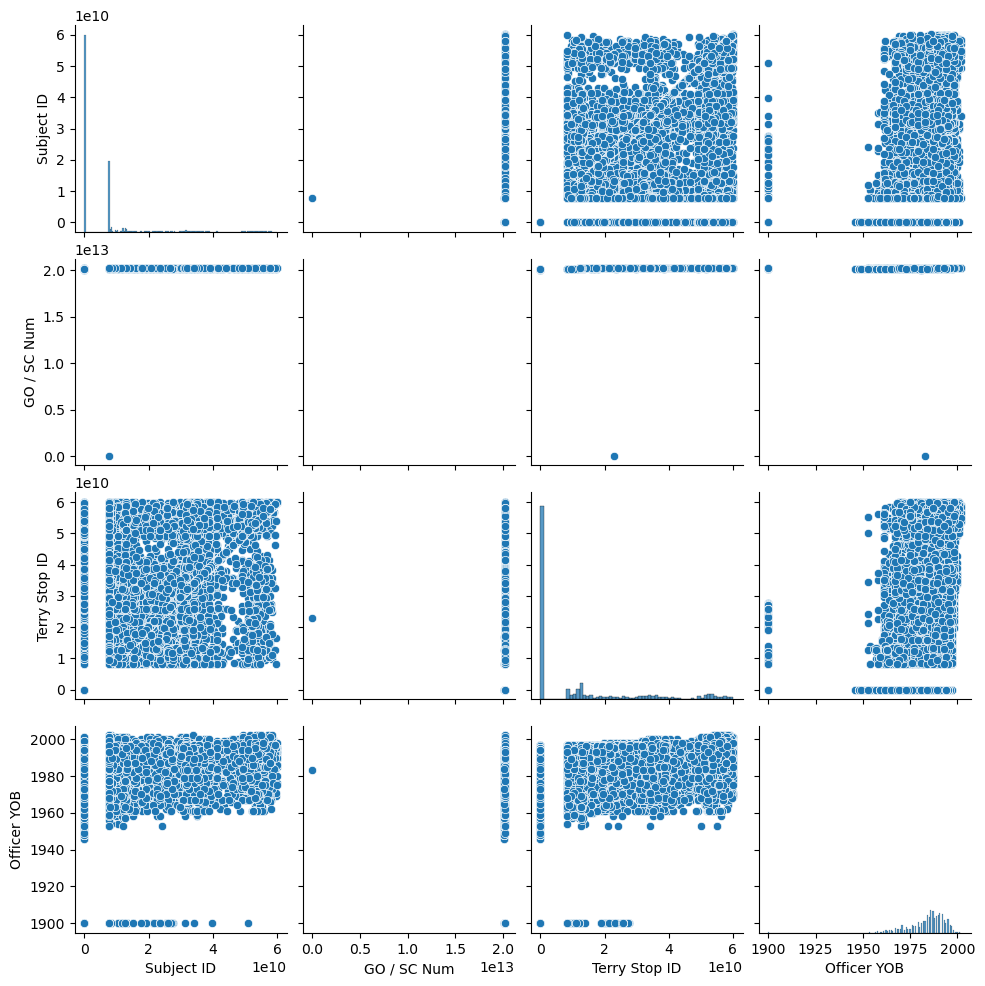

In [30]:
sns.pairplot(seattle_data)

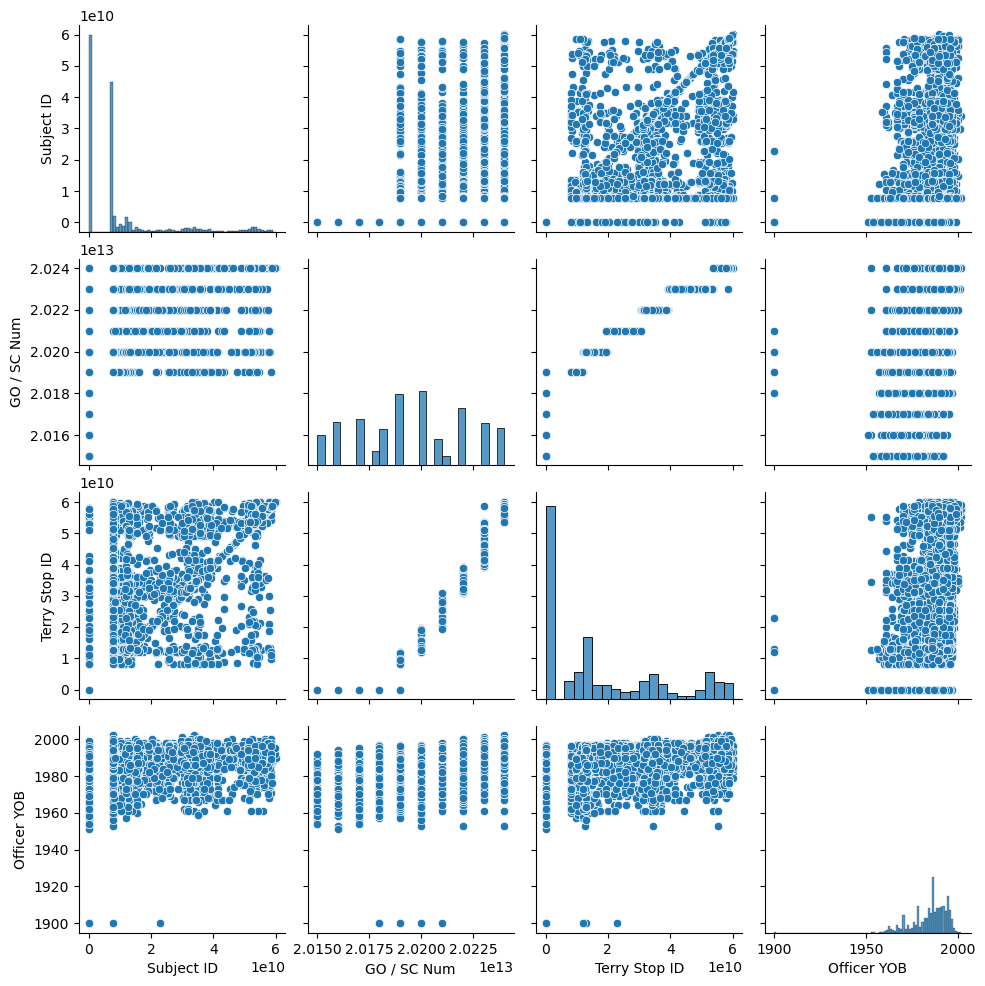

In [31]:
sns.pairplot(suspicious_rows)

In [32]:
seattle_data['Stop Resolution'].value_counts()

Stop Resolution
Field Contact               29927
Offense Report              15769
Arrest                      14912
Referred for Prosecution      728
Citation / Infraction         219
Name: count, dtype: int64

In [33]:
seattle_data = seattle_data.replace(['None','-','N/A','Unknown','Unable to Determine','Not Specified'],np.nan)
suspicious_rows= suspicious_rows.replace(['None','-','N/A','Unknown','Unable to Determine','Not Specified'], np.nan)

In [34]:
from sklearn.preprocessing import LabelEncoder

#create an instance of LabelEncoder
target_transform = LabelEncoder()

# Fit and transform train
seattle_data['Arrest Flag'] = target_transform.fit_transform(seattle_data['Arrest Flag'])
suspicious_rows['Arrest Flag'] = target_transform.fit_transform(suspicious_rows['Arrest Flag'])

seattle_data['Arrest Flag']
suspicious_rows['Arrest Flag']


10       0
17       0
21       0
26       0
28       0
        ..
61518    0
61530    0
61534    0
61552    0
61553    0
Name: Arrest Flag, Length: 9112, dtype: int32

In [35]:
suspicious_rows

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
10              46 - 55   7729104232  20190000307817     9738671045   
17              26 - 35           -1  20150000268950          69904   
21              46 - 55           -1  20170000235259         280796   
26              36 - 45           -1  20180000027304         381991   
28              18 - 25           -1  20170000160027         262136   
...                 ...          ...             ...            ...   
61518           18 - 25           -1  20160000065750         131490   
61530               NaN           -1  20230000180196    51136054624   
61534           36 - 45  41526067949  20230000035588    41525937507   
61552           46 - 55   7730411376  20190000291454     9639449799   
61553           36 - 45   8516362629  20210000261258    27909435581   

      Stop Resolution    Weapon Type Officer ID  Officer YOB Officer Gender  \
10      Field Contact            NaN       8538         1994              M   
17             Arrest  Firearm Other       7472         1981              M   
21     Offense Report            NaN       7773         1978              M   
26     Offense Report            NaN       7578         1980              M   
28     Offense Report            NaN       7700         1990              M   
...               ...            ...        ...          ...            ...   
61518  Offense Report            NaN       7571         1979              M   
61530   Field Contact            NaN       8582         1991              M   
61534   Field Contact            NaN       6758         1970              F   
61552   Field Contact            NaN       8643         1989              F   
61553   Field Contact            NaN       8674         1990              M   

      Officer Race  ...     Reported Time  \
10           White  ...  03:02:36.0000000   
17           White  ...  19:25:00.0000000   
21           White  ...  22:12:00.0000000   
26           White  ...  07:23:00.0000000   
28           White  ...  15:29:00.0000000   
...            ...  ...               ...   
61518        White  ...  05:39:00.0000000   
61530        White  ...  01:27:58.0000000   
61534        White  ...  21:21:00.0000000   
61552        White  ...  11:23:52.0000000   
61553        White  ...  08:49:06.0000000   

                                Initial Call Type  \
10     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
17     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
21     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
26     SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
28        SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
...                                           ...   
61518     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61530     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61534     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61552  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
61553  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   

                                 Final Call Type Call Type  \
10              --WARRANT SERVICES - MISDEMEANOR    ONVIEW   
17                   --WARRANT SERVICES - FELONY    ONVIEW   
21      --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   
26     --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
28     --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
...                                          ...       ...   
61518  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE       911   
61530   --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON       911   
61534  --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   
61552           --WARRANT SERVICES - MISDEMEANOR    ONVIEW   
61553   --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   

                                   Officer Squad Arrest Flag Frisk Flag  \
10                   WEST PCT 3RD W - K/Q RELIEF           0          N   
17                        EAST PCT 2ND W - BEATS           0          N   
21                  NORTH PCT 3RD W - B/N RELIEF        

In [36]:
suspicious_rows['Initial Call Type'].value_counts()

Initial Call Type
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW    4850
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT       4255
OBS - SUSPICIOUS PACKAGE                         7
Name: count, dtype: int64

In [37]:
# features = ['Subject Age Group', 'Weapon Type', 'Officer YOB','Officer Gender', 'Officer Race', 'Subject Perceived Race','Initial Call Type', 'Precinct']
features = ['Initial Call Type','Stop Resolution','Officer Gender', 'Officer Race','Subject Perceived Gender', 'Subject Perceived Race','Frisk Flag']
feature_data = seattle_data[features]
# feature_data = suspicious_rows[features]
X = feature_data
y = seattle_data['Arrest Flag']


In [38]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3, test_size=0.2, stratify=y)

In [39]:
print(f"X_train for the seattle dataset is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} colums.")
print(f"y_train for seattle dataset is a Series with {y_train.shape[0]} values.")

X_train for the seattle dataset is a DataFrame with 49244 rows and 7 colums.
y_train for seattle dataset is a Series with 49244 values.


In [40]:
X_train.dtypes

Initial Call Type           object
Stop Resolution             object
Officer Gender              object
Officer Race                object
Subject Perceived Gender    object
Subject Perceived Race      object
Frisk Flag                  object
dtype: object

Let's change the column names to a more conventional style. I'll create a function that will for the columns.

In [41]:
def reformat_columns(data, return_type='dataframe'):
    '''Function that reformat the columns.
    adding an underscore to the naming convention and lowering the font'''
    if isinstance(data, pd.DataFrame):
        # Reformat columns for DataFrame
        formatted_columns = data.rename(columns=lambda x: x.replace(' ', '_').lower())
        if return_type == "dataframe":
            return formatted_columns
        elif return_type == "series":
            return formatted_columns.columns.to_series()
        else:
            raise ValueError("return_type must be either 'dataframe' or 'series' when data is a DataFrame.")
            
      # Check if the input is a Series
    elif isinstance(data, pd.Series):
        # Reformat the Series name if it has one
        formatted_columns = data.rename(data.name.replace(' ', '_').lower() if data.name else None)
    return formatted_columns

In [42]:
#Let's change the string style to a more conventional style
X_train = reformat_columns(X_train)
X_train.columns

Index(['initial_call_type', 'stop_resolution', 'officer_gender',
       'officer_race', 'subject_perceived_gender', 'subject_perceived_race',
       'frisk_flag'],
      dtype='object')

In [43]:
y_train = reformat_columns(y_train)
y_train.name

'arrest_flag'

In [44]:
X_test = reformat_columns(X_test)
X_test.columns

Index(['initial_call_type', 'stop_resolution', 'officer_gender',
       'officer_race', 'subject_perceived_gender', 'subject_perceived_race',
       'frisk_flag'],
      dtype='object')

In [45]:
y_test = reformat_columns(y_test)
y_test.name

'arrest_flag'

We start by imputing the data, this will account for any missing values in the train and test set.

In [46]:
imputer = SimpleImputer(strategy='constant', fill_value=None)
imputer.fit(X_train)


# transform the features
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_imputed_df = pd.DataFrame(X_train_imputed,
                                columns=X_train.columns, 
                                index=X_train.index
                                )


X_test_imputed_df = pd.DataFrame(X_test_imputed, 
                                columns=X_test.columns, 
                                index=X_test.index
                                )

    



In [47]:
X_train_imputed_df

initial_call_type stop_resolution  \
5168                                    SHOPLIFT - THEFT          Arrest   
55797        BURG - RESD (INCL UNOCC STRUCTURES ON PROP)          Arrest   
45053            SUSPICIOUS PERSON, VEHICLE, OR INCIDENT          Arrest   
60562  OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...   Field Contact   
54979                 OBS - DOWN - CHECK FOR PERSON DOWN  Offense Report   
...                                                  ...             ...   
24303           ROBBERY - CRITICAL (INCLUDES STRONG ARM)          Arrest   
6810                                            TRESPASS          Arrest   
19193          THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)   Field Contact   
49688            SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   Field Contact   
15130  OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...  Offense Report   

      officer_gender officer_race subject_perceived_gender  \
5168               M        White                     Male   
55797              F        White                     Male   
45053              M        White                     Male   
60562              M     Hispanic                     Male   
54979              M        White                   Female   
...              ...          ...                      ...   
24303              F        White                   Female   
6810               M        White                     Male   
19193              M        White                     Male   
49688              M        White                   Female   
15130              M     Hispanic                     Male   

          subject_perceived_race frisk_flag  
5168   Black or African American          N  
55797  Black or African American          N  
45053  Black or African American          Y  
60562              missing_value          Y  
54979                      White          N  
...                          ...        ...  
24303  Black or African American          N  
6810                       White          N  
19193  Black or African American          N  
49688                      White          N  
15130                      White          Y  

[49244 rows x 7 columns]

In [48]:
X_train_imputed_df['stop_resolution'].value_counts()

stop_resolution
Field Contact               23912
Offense Report              12624
Arrest                      11954
Referred for Prosecution      580
Citation / Infraction         174
Name: count, dtype: int64

Check each column in the dataframe

In [49]:
X_test_imputed_df

initial_call_type stop_resolution  \
760                                       missing_value   Field Contact   
13752        SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   Field Contact   
52693                                          TRESPASS  Offense Report   
35199                                SUICIDE - CRITICAL  Offense Report   
10135  NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)   Field Contact   
...                                                 ...             ...   
28238         THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)          Arrest   
11261                                ASLT - DV CRITICAL          Arrest   
1964           ROBBERY - CRITICAL (INCLUDES STRONG ARM)  Offense Report   
9707      THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)  Offense Report   
21653            OBS - NOISE - DISTURBANCE (PARTY, ETC)          Arrest   

      officer_gender       officer_race subject_perceived_gender  \
760                M              White                   Female   
13752              M              White                     Male   
52693              F              White                     Male   
35199              M              White                   Female   
10135              M              White                     Male   
...              ...                ...                      ...   
28238              M              White                     Male   
11261              M  Two or More Races                     Male   
1964               M              White                   Female   
9707               M              White                     Male   
21653              M           Hispanic                     Male   

          subject_perceived_race frisk_flag  
760                        White          N  
13752              missing_value          N  
52693  Black or African American          N  
35199                      White          N  
10135                      White          N  
...                          ...        ...  
28238                      White          N  
11261                      Asian          N  
1964                       White          N  
9707                       White          Y  
21653               Multi-Racial          N  

[12311 rows x 7 columns]

In [50]:
for val in X_train_imputed_df.columns:
    print(X_train[[val]].value_counts().sort_values(ascending=True))
    print()

initial_call_type                         
PHONE - OBSCENE OR NUISANCE PHONE CALLS          1
LITTERING                                        1
PUBLIC DISPLAY OF PORNOGRAPHY                    1
PREPLANNED EVENT                                 1
HARBOR - WATER EMERGENCIES                       1
                                              ... 
TRESPASS                                      2005
ASLT - CRITICAL (NO SHOOTINGS)                2213
DISTURBANCE                                   2436
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT       3420
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW    3858
Name: count, Length: 175, dtype: int64

stop_resolution         
Citation / Infraction         174
Referred for Prosecution      580
Arrest                      11954
Offense Report              12624
Field Contact               23912
Name: count, dtype: int64

officer_gender
N                    21
F                  5570
M                 43653
Name: count, dtype: int64

officer_race        

In [51]:
X_test_imputed_df

initial_call_type stop_resolution  \
760                                       missing_value   Field Contact   
13752        SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   Field Contact   
52693                                          TRESPASS  Offense Report   
35199                                SUICIDE - CRITICAL  Offense Report   
10135  NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)   Field Contact   
...                                                 ...             ...   
28238         THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)          Arrest   
11261                                ASLT - DV CRITICAL          Arrest   
1964           ROBBERY - CRITICAL (INCLUDES STRONG ARM)  Offense Report   
9707      THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)  Offense Report   
21653            OBS - NOISE - DISTURBANCE (PARTY, ETC)          Arrest   

      officer_gender       officer_race subject_perceived_gender  \
760                M              White                   Female   
13752              M              White                     Male   
52693              F              White                     Male   
35199              M              White                   Female   
10135              M              White                     Male   
...              ...                ...                      ...   
28238              M              White                     Male   
11261              M  Two or More Races                     Male   
1964               M              White                   Female   
9707               M              White                     Male   
21653              M           Hispanic                     Male   

          subject_perceived_race frisk_flag  
760                        White          N  
13752              missing_value          N  
52693  Black or African American          N  
35199                      White          N  
10135                      White          N  
...                          ...        ...  
28238                      White          N  
11261                      Asian          N  
1964                       White          N  
9707                       White          Y  
21653               Multi-Racial          N  

[12311 rows x 7 columns]

# One-Hot Encoder
We'll perform one-hot encoding on the categorical variables

## Normalize the target for the train and test

In [52]:
y_train

5168     0
55797    1
45053    0
60562    0
54979    0
        ..
24303    0
6810     1
19193    0
49688    0
15130    0
Name: arrest_flag, Length: 49244, dtype: int32

0 = No, 1 = Yes

This allowed us to encode our target to a binary classification?

In [53]:

def one_hot_encode(train_data, test_data, drop='first', handle_unknown='ignore'):
    """
    Perform one-hot encoding on the categorical columns of train and test datasets.
    
    Parameters:
    - train_data (pd.DataFrame): The training dataset with categorical columns.
    - test_data (pd.DataFrame): The test dataset with categorical columns.
    - drop (str): Specifies a method to drop one of the levels. Default is 'first'.
    - handle_unknown (str): Specifies how to handle unknown categories. Default is 'ignore'.
    
    Returns:
    - train_encoded_df (pd.DataFrame): One-hot encoded training data as a DataFrame.
    - test_encoded_df (pd.DataFrame): One-hot encoded test data as a DataFrame.
    - encoded_columns (list): List of encoded column names.
    """
    # One-Hot Encoding on the ordinal encoded training data
    
    ohe = OneHotEncoder(sparse_output=False, drop=drop, handle_unknown=handle_unknown)
    
    # Ensure only the columns without unknown values are passed to OneHotEncoder
    X_train_encoder = ohe.fit_transform(train_data)
    
    # Apply One-Hot Encoding to the test data
    X_test_encoder = ohe.transform(test_data)
    
    # Get the encoded feature names
    encoded_columns = ohe.get_feature_names_out(input_features=train_data.columns)
    
    # Convert to DataFrames
    train_encoded_df = pd.DataFrame(X_train_encoder, columns=encoded_columns, index=train_data.index)
    test_encoded_df = pd.DataFrame(X_test_encoder, columns=encoded_columns, index=test_data.index)

    return train_encoded_df, test_encoded_df, encoded_columns

X_train_encoded_df, X_test_encoded_df, encoded_columns = one_hot_encode(X_train_imputed_df, X_test_imputed_df)


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [54]:
X_test_encoded_df

initial_call_type_-ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR)  \
760                                                  0.0                  
13752                                                0.0                  
52693                                                0.0                  
35199                                                0.0                  
10135                                                0.0                  
...                                                  ...                  
28238                                                0.0                  
11261                                                0.0                  
1964                                                 0.0                  
9707                                                 0.0                  
21653                                                0.0                  

       initial_call_type_-ASSIGNED DUTY - STAKEOUT  \
760                                            0.0   
13752                                          0.0   
52693                                          0.0   
35199                                          0.0   
10135                                          0.0   
...                                            ...   
28238                                          0.0   
11261                                          0.0   
1964                                           0.0   
9707                                           0.0   
21653                                          0.0   

       initial_call_type_ABDUCTION - CRITICAL  \
760                                       0.0   
13752                                     0.0   
52693                                     0.0   
35199                                     0.0   
10135                                     0.0   
...                                       ...   
28238                                     0.0   
11261                                     0.0   
1964                                      0.0   
9707                                      0.0   
21653                                     0.0   

       initial_call_type_ABDUCTION - NO KNOWN KIDNAPPING  \
760                                                  0.0   
13752                                                0.0   
52693                                                0.0   
35199                                                0.0   
10135                                                0.0   
...                                                  ...   
28238                                                0.0   
11261                                                0.0   
1964                                                 0.0   
9707                                                 0.0   
21653                                                0.0   

       initial_call_type_ALARM - ATM MACHINE, FREE STANDING  \
760                                                  0.0      
13752                                                0.0      
52693                                                0.0      
35199                                                0.0      
10135                                                0.0      
...                                                  ...      
28238                                                0.0      
11261                                                0.0      
1964                                                 0.0      
9707                                                 0.0      
21653                                                0.0      

       initial_call_type_ALARM - AUDIBLE AUTOMOBILE (UNOCC/ANTI-THEFT)  \
760                                                  0.0                 
13752                                                0.0                 
52693                                                0.0                 
35199                                                0.0                 
10135               

In [55]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded_df)

X_test_scaled = scaler.transform(X_test_encoded_df)

X_train_scaled_df = pd.DataFrame(X_train_scaled, 
                                 columns=X_train_encoded_df.columns,
                                 index=X_train_encoded_df.index)

X_test_scaled_df = pd.DataFrame(X_test_encoded_df,
                                columns=X_test_encoded_df.columns,
                                index=X_test_encoded_df.index)

X_train_scaled_df

initial_call_type_-ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR)  \
5168                                            -0.01352                  
55797                                           -0.01352                  
45053                                           -0.01352                  
60562                                           -0.01352                  
54979                                           -0.01352                  
...                                                  ...                  
24303                                           -0.01352                  
6810                                            -0.01352                  
19193                                           -0.01352                  
49688                                           -0.01352                  
15130                                           -0.01352                  

       initial_call_type_-ASSIGNED DUTY - STAKEOUT  \
5168                                     -0.004506   
55797                                    -0.004506   
45053                                    -0.004506   
60562                                    -0.004506   
54979                                    -0.004506   
...                                            ...   
24303                                    -0.004506   
6810                                     -0.004506   
19193                                    -0.004506   
49688                                    -0.004506   
15130                                    -0.004506   

       initial_call_type_ABDUCTION - CRITICAL  \
5168                                -0.007805   
55797                               -0.007805   
45053                               -0.007805   
60562                               -0.007805   
54979                               -0.007805   
...                                       ...   
24303                               -0.007805   
6810                                -0.007805   
19193                               -0.007805   
49688                               -0.007805   
15130                               -0.007805   

       initial_call_type_ABDUCTION - NO KNOWN KIDNAPPING  \
5168                                           -0.006373   
55797                                          -0.006373   
45053                                          -0.006373   
60562                                          -0.006373   
54979                                          -0.006373   
...                                                  ...   
24303                                          -0.006373   
6810                                           -0.006373   
19193                                          -0.006373   
49688                                          -0.006373   
15130                                          -0.006373   

       initial_call_type_ALARM - ATM MACHINE, FREE STANDING  \
5168                                           -0.004506      
55797                                          -0.004506      
45053                                          -0.004506      
60562                                          -0.004506      
54979                                          -0.004506      
...                                                  ...      
24303                                          -0.004506      
6810                                           -0.004506      
19193                                          -0.004506      
49688                                          -0.004506      
15130                                          -0.004506      

       initial_call_type_ALARM - AUDIBLE AUTOMOBILE (UNOCC/ANTI-THEFT)  \
5168                                           -0.009013                 
55797                                          -0.009013                 
45053                                          -0.009013                 
60562                                          -0.009013                 
54979               

Try to find the best correlation between the features and the target

In [56]:
# # Calculate correlations for each feature in X_train_encoded_df with y_train_encoded_series
# target_correlation = X_train_encoded_df.corrwith(y_train)

# # Convert to DataFrame for easier visualization
# correlation_df = target_correlation.to_frame(name="Correlation with Target")

# # Get the top 10 features with the closest (highest absolute) correlation to the target
# top_10_features = correlation_df['Correlation with Target'].abs().nlargest(15).index
# top_10_correlation_df = correlation_df.loc[top_10_features].sort_values(by="Correlation with Target", ascending=False)
# top_10_correlation_df
# Calculate correlations for each feature in X_train_encoded_df with y_train_encoded_series
target_correlation = X_train_scaled_df.corrwith(y_train)

# Convert to DataFrame for easier visualization
correlation_df = target_correlation.to_frame(name="Correlation with Target")

# Get the top 10 features with the closest (highest absolute) correlation to the target
top_10_features = correlation_df['Correlation with Target'].abs().nlargest(10).index
top_10_correlation_df = correlation_df.loc[top_10_features].sort_values(by="Correlation with Target", ascending=False)
top_10_correlation_df

Correlation with Target
frisk_flag_Y                                                       0.103170
initial_call_type_ASLT - DV CRITICAL                               0.062409
initial_call_type_SHOPLIFT - THEFT                                 0.060982
initial_call_type_ASLT - CRITICAL (NO SHOOTINGS)                   0.053802
initial_call_type_THREATS (INCLS IN-PERSON/BY P...                 0.052643
officer_race_White                                                -0.041928
subject_perceived_race_Hispanic                                   -0.059095
initial_call_type_missing_value                                   -0.153833
stop_resolution_Offense Report                                    -0.205260
stop_resolution_Field Contact                                     -0.339656

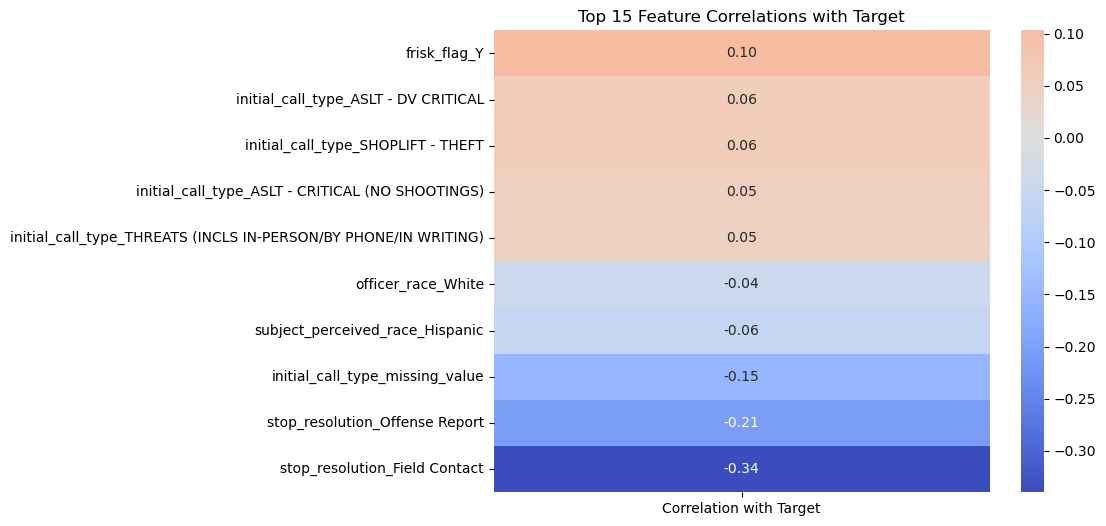

In [57]:
# Plot the correlations of top 5 features
plt.figure(figsize=(8, 6))
sns.heatmap(top_10_correlation_df, annot=True, cmap="coolwarm", center=0, cbar=True, fmt=".2f")
plt.title("Top 15 Feature Correlations with Target")
plt.show()

# Model Evaluation

### Train a vanilla classifier

We will use a Logistic Regression to start to have a base and see the differences as we create or model.

First, we will tackle the imbalance issue by performing SMOTE. Run smote on the minority data later.

In [58]:
# from imblearn.over_sampling import SMOTE

# print('Original Class Distribution:\n')
# print(y.value_counts())

# smote = SMOTE(random_state=33)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded_df, y_train)

# print('--------------------------------------------')
# print('Synthetic Sample Class Distributions: \n')
# print(pd.Series(y_train_resampled).value_counts())



In [59]:
# X_train_resampled.value_counts().sum()

Logistic Regression Metrics

Accuracy: 89.11%
Precision: 0.00%
Recall:  0.00%
F1 Score: 0.00%
ROC AUC Score: 93.76%

Confusion Matrix:
 [[10970     0]
 [ 1341     0]]


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


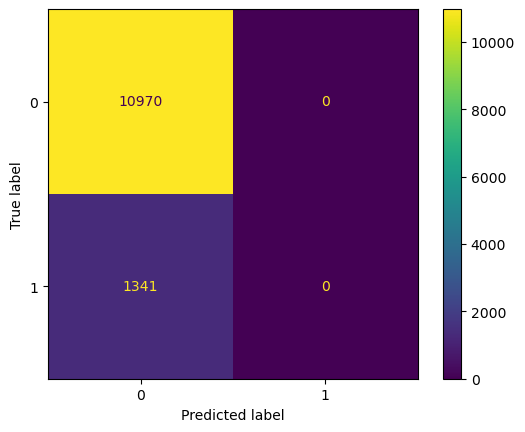

In [60]:
baseline_model = LogisticRegression(random_state=23, solver='newton-cholesky', class_weight='balanced')

# baseline_model.fit(X_train_resampled, y_train_resampled)
baseline_model.fit(X_train_scaled_df, y_train)

y_predict = baseline_model.predict(X_test_scaled_df)



# Calculate evaluation metrics
baseline_model_accuracy = accuracy_score(y_test, y_predict)
baseline_model_precision = precision_score(y_test, y_predict, pos_label=1)
baseline_model_recall = recall_score(y_test, y_predict, pos_label=1)
baseline_model_f1 = f1_score(y_test, y_predict, pos_label=1)

# Probabilities
y_probabilites = baseline_model.predict_proba(X_test_scaled_df)[:,1]

false_positive, true_positive, thresholds = roc_curve(y_test, y_probabilites)

roc_auc = auc(false_positive, true_positive)



# Display results
print('Logistic Regression Metrics\n')
print(f"Accuracy: {baseline_model_accuracy*100:.2f}%")
print(f"Precision: {baseline_model_precision*100:.2f}%")
print(f"Recall:  {baseline_model_recall*100:.2f}%")
print(f"F1 Score: {baseline_model_f1*100:.2f}%")
print(f"ROC AUC Score: {roc_auc*100:.2f}%")
print()

# Confusion Matrix
baseline_model_conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",baseline_model_conf_matrix)

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

## Logisitic Visualizations

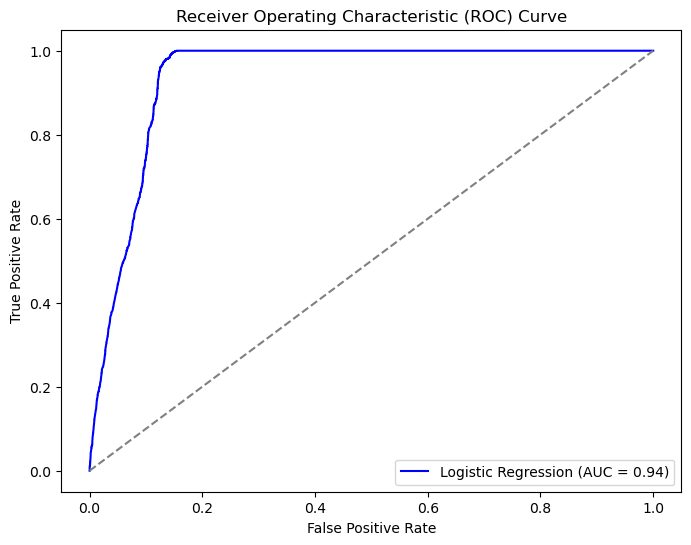

ROC AUC Score: 0.9375569055868591


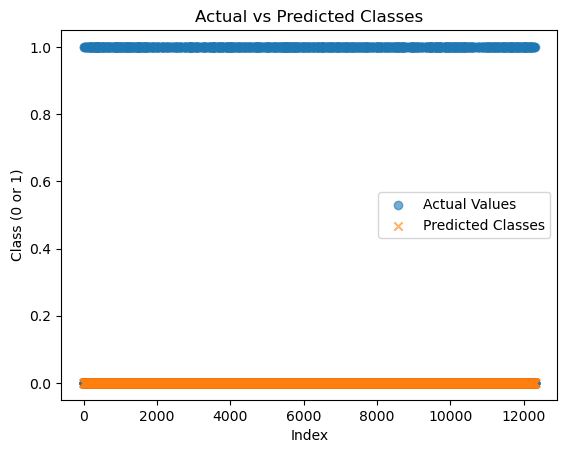

In [61]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive, true_positive, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC score
print(f"ROC AUC Score: {roc_auc}")


y_pred_classes = (y_predict > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', alpha=0.6)
plt.scatter(range(len(y_pred_classes)), y_pred_classes, label='Predicted Classes', marker='x', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Class (0 or 1)')
plt.title('Actual vs Predicted Classes')
plt.legend()
plt.savefig('./images/LogisticROC_Curve.png')
plt.show()

TP: 0

FP: 0

FN: 1341 (All instances of the minority calss are misclassified)

TN: 10970 (Correctly predicting Majority Class)

### Baseline Metrics

The model is completely ignoring the minority class within the baseline. Inidicating high bias towards the majority class, in this case (No arrests made)

These metrics provide the following:

* Accuracy: 89.11%

An Accuracy score of  87%. As stated above, this dataset is heavily imbalanced with a ratio of 9:1. 

* Precision: 0

Precision prediction means the model cannot make predictions on True Positives or False positive values. It can't make a the distinction between if an actual arrest was made or an arrest was made but it shouldn't have occured.

* Recall: 0

This means that the model is not predicting the number of the actual positive cases, which are indicated as Arrests made.

* F1 SCore: 0

Because precision is 0 and recall is, by default, F1 is 0 since it's a combination of the two.

* ROC AUC Score: 95%

This is excellent, this means the model is very good at distinguishing between the positive and negative classes. A strong performance overall.



**Accuracy** is 89%, which validates the choice to fix the imbalance mentioned earlier

**Recall** is predicting 0% of True Positive Cases, meaning the model is not predicting cases that are actual arrests.

**ROC AUC** is excellent, showing that the model has a good ability to distinguish between classes based on predicted probability. However, this does not mean the model is making correct predictions for th eminority class.

**Our Baseline model provides us with bad metrics to use for our predictions. The purpose of this classification is to determine if it can predict a True Positive arrest based on the features within the mode. This model does not provid us with any information to make those predictions.**


Next we will use a Decision Tree Classifier to improve the models performance and build on our baseline. In an attempt to try and get a balanced prediction for both classes, I'll use 'Class weight' again to try to balance the data.

In [62]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=33, class_weight='balanced').fit(X_train_scaled_df, y_train)


# print to see the results of the tree. This will help us detrmine if the model will overfit or underfit
print(f'Training: {dt.score(X_train_scaled_df, y_train)}')
print(f'Test: {dt.score(X_test_scaled_df, y_test)}')

Training: 0.9057550158394931
Test: 0.8647550970676631


The **R-squared** value of 91% of the variance for training data. The model is fitting the training data very well.

The test score explains 87% of the variance in the test data. This is still a good score, but it is less than the training data. Indicating some overfitting.

The model fits training data very well but generalizes slightly less well to unseen data.

### Make Predictions

In [63]:
#make predictions
y_pred = dt.predict(X_test_encoded_df)

In [64]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
y_test

760      0
13752    0
52693    0
35199    0
10135    0
        ..
28238    0
11261    1
1964     0
9707     0
21653    0
Name: arrest_flag, Length: 12311, dtype: int32

Decision Tree Performance:

Accuracy: 86.48%

Precision: 43.70%

Recall: 83.82%

F1-Score: 57.45%


Confusion Matrix
[[9522 1448]
 [ 217 1124]]


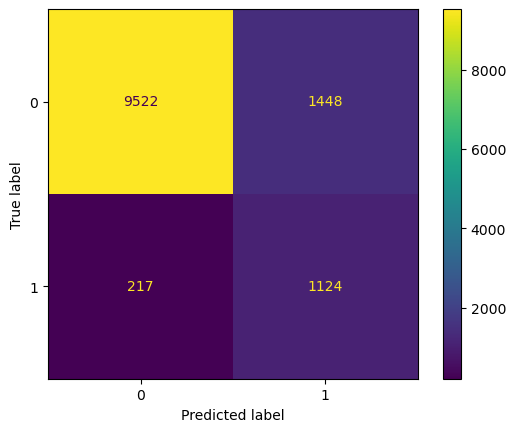

In [66]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

confus_matrix = confusion_matrix(y_test,y_pred)

print("Decision Tree Performance:\n")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print(f"Precision: {precision * 100:.2f}%\n")
print(f"Recall: {recall * 100:.2f}%\n")
print(f"F1-Score: {f1 * 100:.2f}%\n")
print("\nConfusion Matrix")
print(confus_matrix)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

We see an improvement in the model, where the model is actually predicting the minorty class

**Recall** is reflecting 83.82%. Means the model succesfully identifies a large portion of True Positive cases/Minority class(Arrests Made). 


**Accuracy** 86.48%. This is a reflection of the imbalance within the data as accuracy is reflecting the majority class because there are more samples. 

The model has become more sensitive to the minority class (class 1), achieving high recall but at the expense of some false positives, as seen in the precision score.

This tradeoff is typical when dealing with imbalanced datasets. The "balanced" class weight helps the decision tree prioritize both classes more equally.

In [67]:
# check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
print(f'{roc_auc * 100:.2f}%')

85.31%


The AUC suggests that the model overall performance for all the data regarding True Positive Rate (TPR) and False Positive Rate (FPR).

With a rate of 92%, this indicates that it can distinguish between arrest being made or not. What are True Positives and what are False Positives. ie. someone arrested or not

We'll attempt some Hyperparameter Tuning and run the metrics again.

# Adjusting Hyperparameters

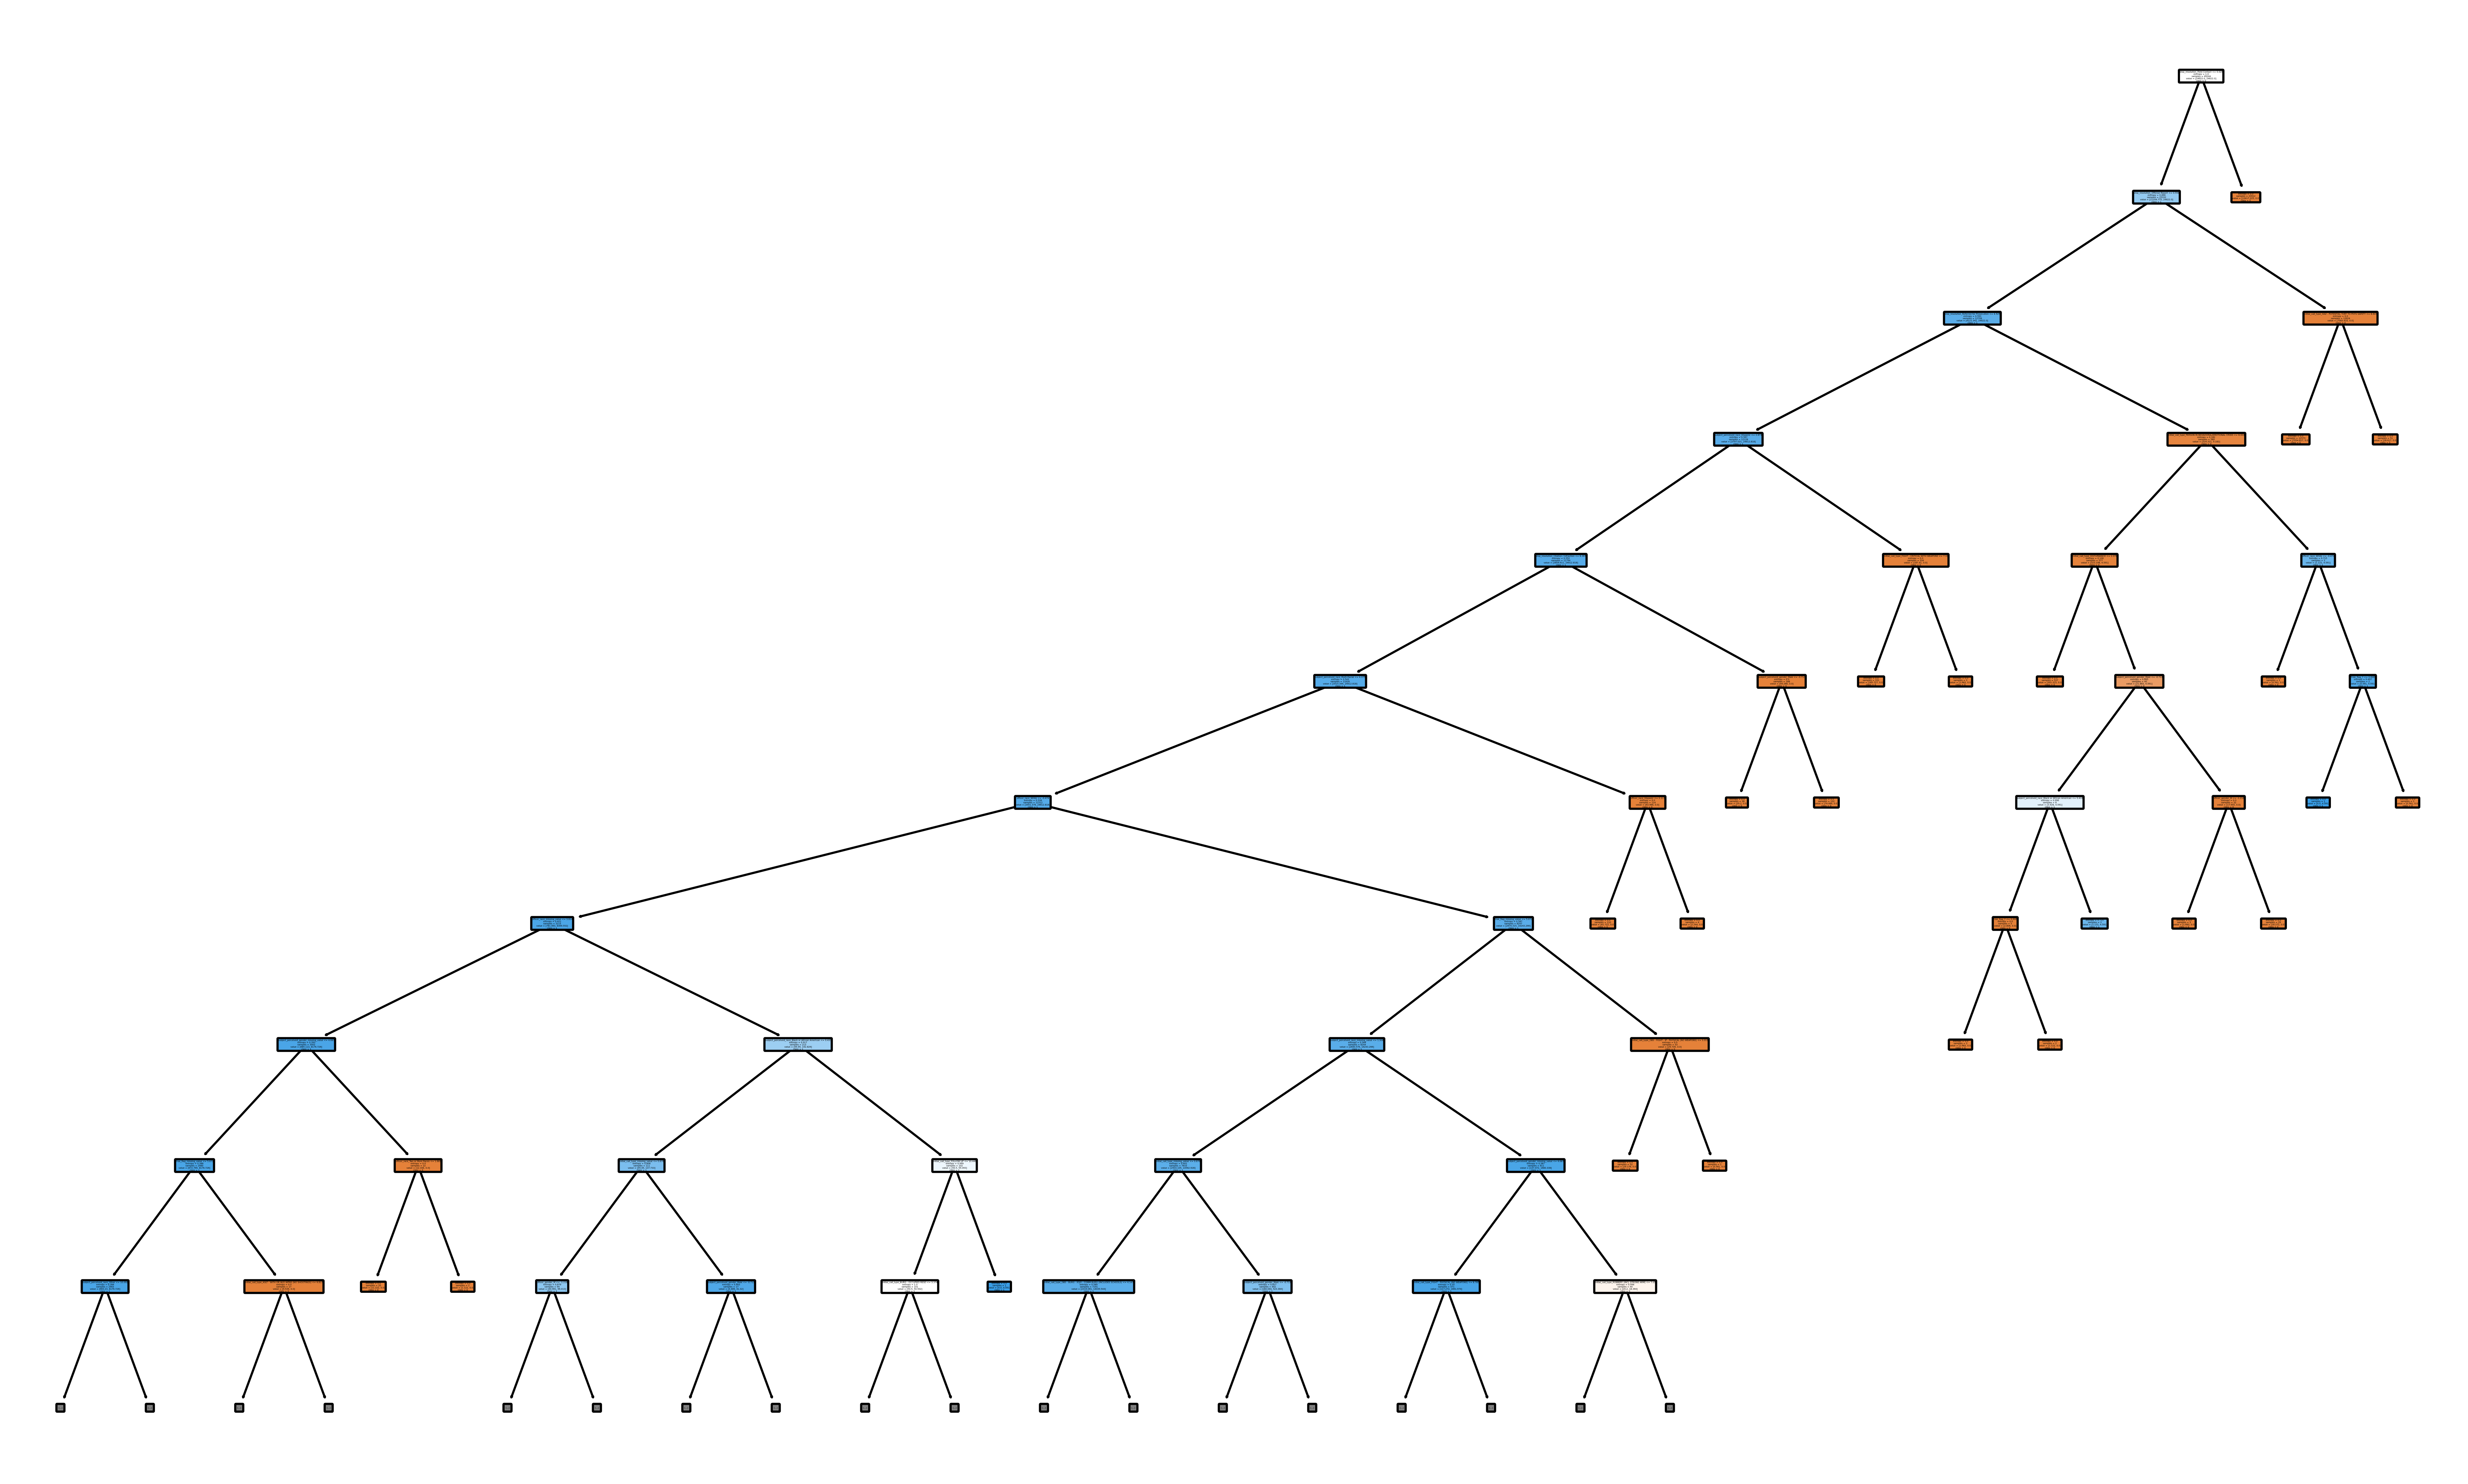

In [68]:
# from sklearn import tree
plt.figure(figsize=(20,12), dpi=500)
tree.plot_tree(dt,
              feature_names=X_train_scaled_df.columns,
              class_names=np.unique(y_train).astype('str'),
              filled=True,
              rounded=True,
              max_depth=10)
plt.savefig('./images/Logistic_plot_tree.png')
plt.show()

We'll start by tuning the max depth for the Classifier

We see a change in the F1 Score showing a little over half of the data is somewhat balanced, but we still get a low F1 score. I'll change the threshold and test it again.

In [69]:
max_depths = [5,10,15]
min_samples_splits = [2,5,10]
min_samples_leaves = [1,2,4]

# store the best parameters and score
best_f1 = -np.inf
best_params = {}

# iterate over the combinations of hyperparameters
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            
            # Instantiate and train the model with the current set of hyperparameters
            model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                class_weight='balanced',
                random_state=33
            ).fit(
                X_train_scaled_df,
                y_train
            )
            
            y_prediction = model.predict(X_test_scaled_df)
            
            f1 = f1_score(y_test, y_prediction)
            
            if f1 > best_f1:
                best_f1 = f1
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }
print(f'Best F1-Score: {best_f1}')
print(f'Best Parameters: {best_params}')


Best F1-Score: 0.6004047672588262
Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}


Max Depth: 5, Precision Score: 0.42557918121231353, Recall Score: 1.0
Max Depth: 6, Precision Score: 0.42557918121231353, Recall Score: 1.0
Max Depth: 7, Precision Score: 0.42557918121231353, Recall Score: 1.0
Max Depth: 8, Precision Score: 0.42557918121231353, Recall Score: 1.0
Max Depth: 9, Precision Score: 0.43923024983119513, Recall Score: 0.9701715137956749
Max Depth: 10, Precision Score: 0.43923024983119513, Recall Score: 0.9701715137956749
Max Depth: 11, Precision Score: 0.43923024983119513, Recall Score: 0.9701715137956749
Max Depth: 12, Precision Score: 0.43923024983119513, Recall Score: 0.9701715137956749
Max Depth: 13, Precision Score: 0.43923024983119513, Recall Score: 0.9701715137956749
Max Depth: 14, Precision Score: 0.43923024983119513, Recall Score: 0.9701715137956749


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Max Depth: 15, Precision Score: 0.0, Recall Score: 0.0


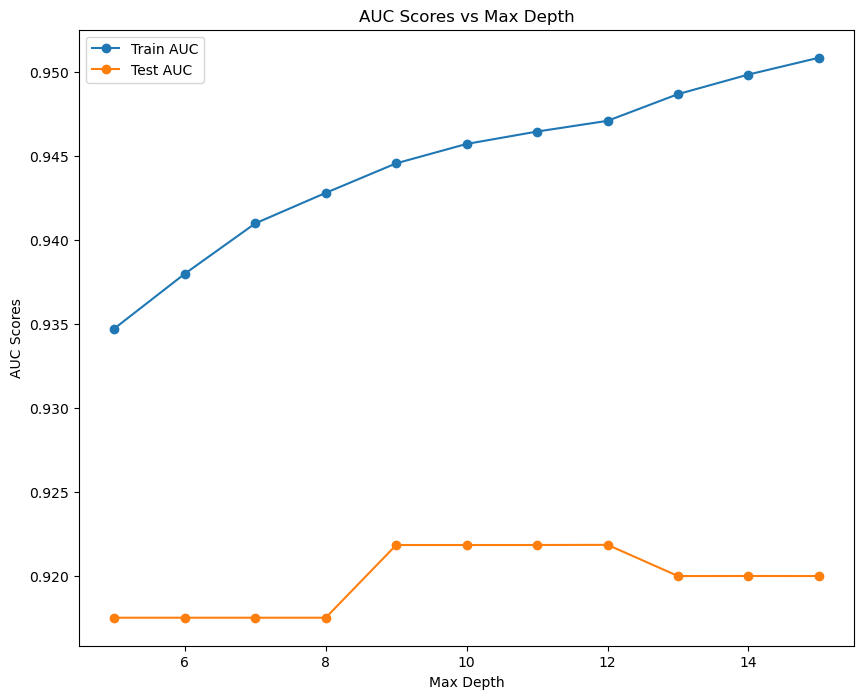

In [110]:
train_auc_threshold = []
test_auc_threshold = []
test_f1_score = []

max_depth_values = np.arange(5,16)

for depth in max_depth_values:
    #Intialize predicted probabilities for training and test sets
    clf = DecisionTreeClassifier(max_depth=depth, random_state=3)
    clf.fit(X_train_scaled_df, y_train)
    
    # Get predicted probabilities for training and test sets, chagning the threshold
    #y_train_pred = clf.predict(X_train_encoded_df)
    #y_test_pred = clf.predict(X_test_encoded_df)
    y_train_prob = clf.predict_proba(X_train_scaled_df)[:,1]
    y_test_prob = clf.predict_proba(X_test_scaled_df)[:,1]
    y_train_pred = (y_train_prob >= 0.4).astype(int)
    y_test_pred = (y_test_prob >= 0.4).astype(int)
    
    # Calculate FPR (False Positive Rate), TPR(True Positive Rate) and test sets using roc_curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    
    # Calculate AUC absed on FPR and TPR using auc
    train_auc = auc(fpr_train, tpr_train)
    test_auc = auc(fpr_test, tpr_test)
    
    # Append AUC to the list
    train_auc_threshold.append(train_auc)
    test_auc_threshold.append(test_auc)
    
    test_f1 = f1_score(y_test, y_test_pred)
    test_f1_score.append(test_f1)

    print(f"Max Depth: {depth}, Precision Score: {precision_score(y_test, y_test_pred)}, Recall Score: {recall_score(y_test, y_test_pred)}")
    

# PLot the figure
plt.figure(figsize=(10,8))
plt.plot(max_depth_values, train_auc_threshold, label="Train AUC", marker="o")
plt.plot(max_depth_values, test_auc_threshold, label="Test AUC", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("AUC Scores")
plt.title('AUC Scores vs Max Depth')
plt.legend()
plt.savefig('./images/Max_depths.png')
plt.show()


We see an increase of the F1-Score from 52% to 64%

Min Sample Split: 2, Precision Score: 0.4615, Recall Score: 0.06263982102908278



c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 3, Precision Score: 0.0000, Recall Score: 0.0

Min Sample Split: 4, Precision Score: 0.4615, Recall Score: 0.06263982102908278



c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 5, Precision Score: 0.0000, Recall Score: 0.0



c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 6, Precision Score: 0.0000, Recall Score: 0.0



c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 7, Precision Score: 0.0000, Recall Score: 0.0



c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 8, Precision Score: 0.0000, Recall Score: 0.0



c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 9, Precision Score: 0.0000, Recall Score: 0.0

Min Sample Split: 10, Precision Score: 0.0000, Recall Score: 0.0



c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


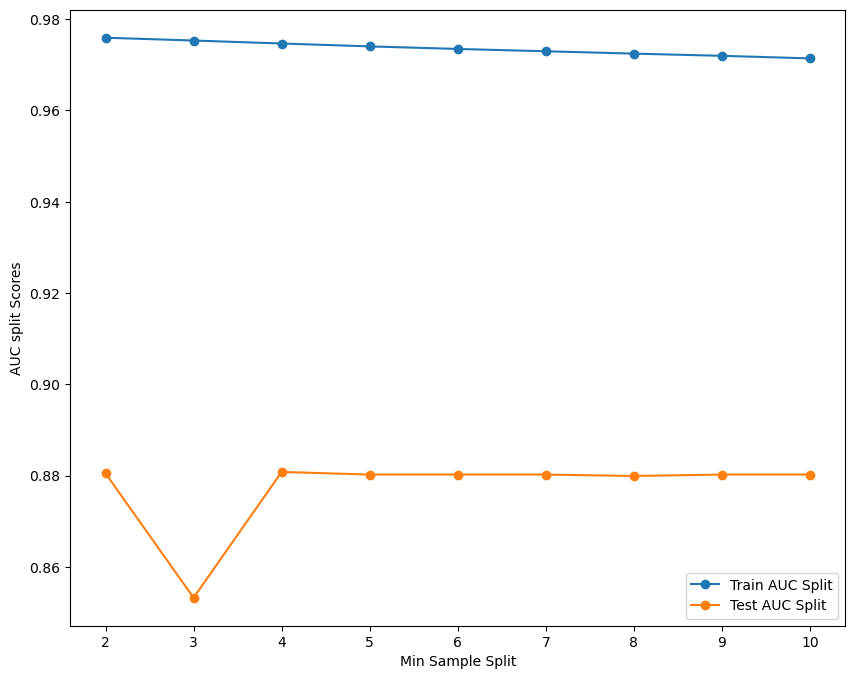

In [111]:
# identify the optimal min-samples-split 
min_sample_splits_value = np.arange(2,11)
train_auc_splits = []
test_auc_splits = []

for split in min_sample_splits_value:
    clf_split = DecisionTreeClassifier(min_samples_split=split, random_state=3)
    clf_split.fit(X_train_scaled_df, y_train)

    y_train_split_pred = clf_split.predict(X_train_scaled_df)
    y_test_split_pred = clf_split.predict(X_test_scaled_df)
    y_train_probs = clf_split.predict_proba(X_train_scaled_df)[:,1]
    y_test_probs = clf_split.predict_proba(X_test_scaled_df)[:,1]

    fpr_train_split, tpr_train_split, _ = roc_curve(y_train, y_train_probs)
    fpr_test_split, tpr_test_split, _ = roc_curve(y_test, y_test_probs)

    train_auc_split = auc(fpr_train_split, tpr_train_split)
    test_auc_split = auc(fpr_test_split, tpr_test_split)
    
    train_auc_splits.append(train_auc_split)
    test_auc_splits.append(test_auc_split)
    # print(f"Min Sample Split: {split}, F1 Score: {f1_score(y_test, y_test_split_probs):.4f}")
    # print(f"Min Sample Split: {split}, Accuracy: {accuracy_score(y_test, y_test_split_probs):.4f}")
    print(f"Min Sample Split: {split}, Precision Score: {precision_score(y_test, y_test_split_pred):.4f}, Recall Score: {recall_score(y_test, y_test_split_pred)}")
    print()


plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value, train_auc_splits, label="Train AUC Split", marker="o")
plt.plot(min_sample_splits_value, test_auc_splits, label="Test AUC Split", marker="o")
plt.xlabel("Min Sample Split")
plt.ylabel("AUC split Scores")
plt.legend()
plt.show()

In this instance, we see the Recall-Score is 85%, and appears to be rising. Again, we change up threshold and see if this makes a change.

Min Sample Split: 2, Precision_Score: 0.4615, Recall Score: 0.06263982102908278


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 3, Precision_Score: 0.0000, Recall Score: 0.0
Min Sample Split: 4, Precision_Score: 0.4615, Recall Score: 0.06263982102908278


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 5, Precision_Score: 0.0000, Recall Score: 0.0


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 6, Precision_Score: 0.0000, Recall Score: 0.0


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 7, Precision_Score: 0.0000, Recall Score: 0.0


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 8, Precision_Score: 0.0000, Recall Score: 0.0


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Split: 9, Precision_Score: 0.0000, Recall Score: 0.0


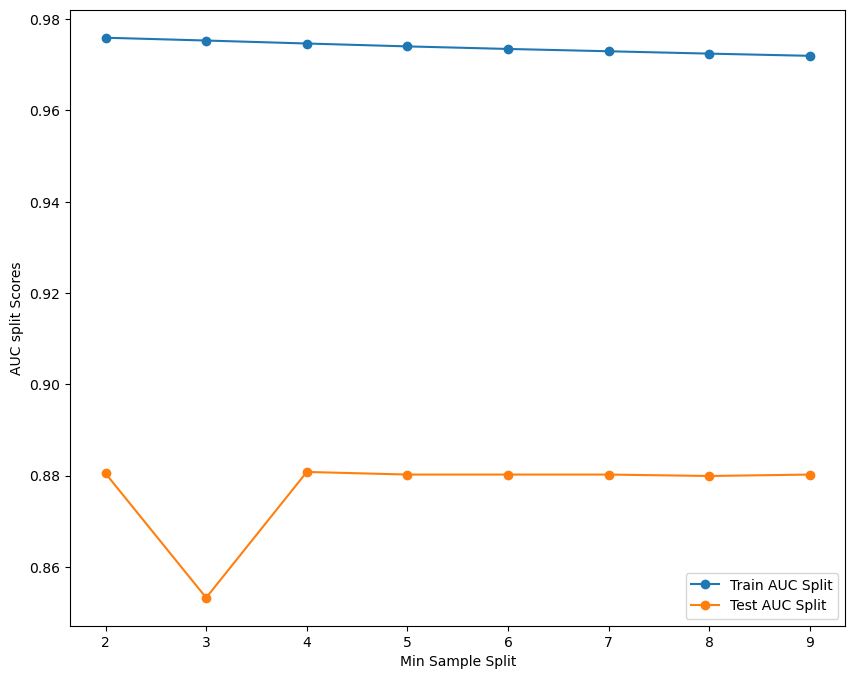

In [72]:
train_auc_splits_thresh = []
test_auc_splits_thresh = []

for split in min_sample_splits_value:
    clf_split = DecisionTreeClassifier(min_samples_split=split, random_state=3)
    clf_split.fit(X_train_scaled_df, y_train)

    # y_train_preds = clf_split.predict(X_train_encoded_df)
    # y_test_preds = clf_split.predict(X_test_encoded_df)
    y_train_probs = clf_split.predict_proba(X_train_scaled_df)[:,1]
    y_test_probs = clf_split.predict_proba(X_test_scaled_df)[:,1]
    
    y_train_preds = (y_train_probs >= 0.4).astype(int)
    y_test_preds = (y_test_probs >= 0.4).astype(int)

    fpr_train_split, tpr_train_split, _ = roc_curve(y_train, y_train_preds)
    fpr_test_split, tpr_test_split, _ = roc_curve(y_test, y_test_preds)

    train_auc_split = auc(fpr_train_split, tpr_train_split)
    test_auc_split = auc(fpr_test_split, tpr_test_split)
    
    train_auc_splits_thresh.append(train_auc_split)
    test_auc_splits_thresh.append(test_auc_split)
    print(f"Min Sample Split: {split}, Precision_Score: {precision_score(y_test, y_test_preds):.4f}, Recall Score: {recall_score(y_test, y_test_preds)}")


plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value, train_auc_splits, label="Train AUC Split", marker="o")
plt.plot(min_sample_splits_value, test_auc_splits, label="Test AUC Split", marker="o")
plt.xlabel("Min Sample Split")
plt.ylabel("AUC split Scores")
plt.legend()
plt.savefig('./images/sample_splits.png')
plt.show()

We see an increase from 54% to 62%

We'll adjust the minimum sample leaf as well.

Min Sample Leaf: 1, Precision Score: 0.46153846153846156
 Accuracy Score: 0.8899358297457558
Min Sample Leaf: 2, Precision Score: 0.4578696343402226
 Accuracy Score: 0.8867679311185119
Min Sample Leaf: 3, Precision Score: 0.4578696343402226
 Accuracy Score: 0.8867679311185119


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Leaf: 4, Precision Score: 0.0
 Accuracy Score: 0.8910730241247665
Min Sample Leaf: 5, Precision Score: 0.4578696343402226
 Accuracy Score: 0.8867679311185119


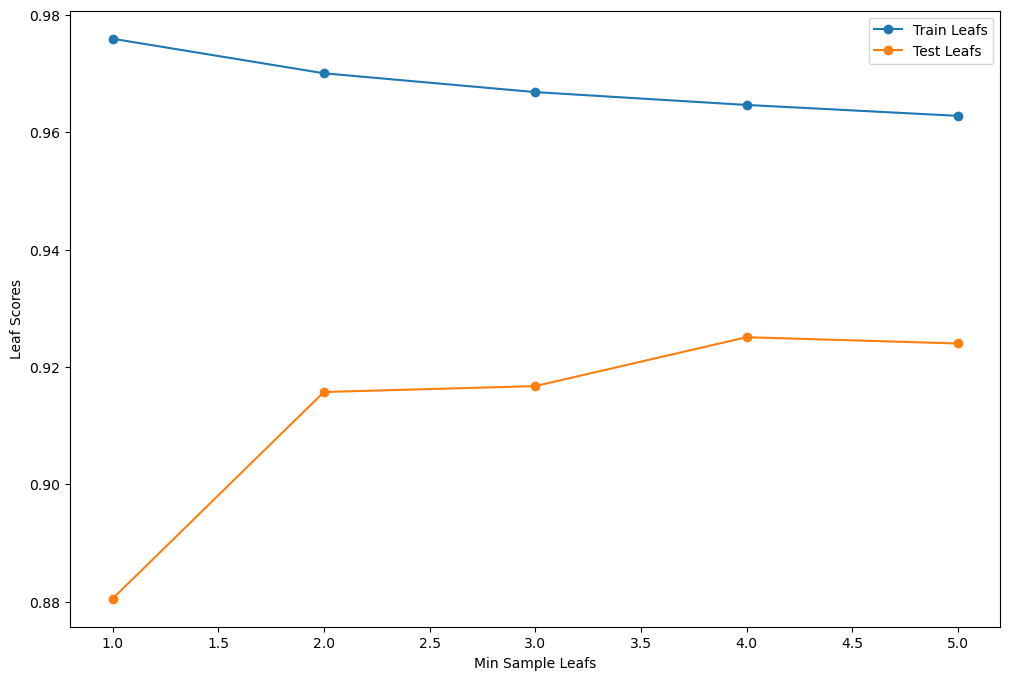

In [112]:
min_sample_leafs_values = np.arange(1,6)
train_auc_leafs = []
test_auc_leafs = []

for leaf in min_sample_leafs_values:
    #instantiate the classifier
    clf_leaf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=3)
    clf_leaf.fit(X_train_scaled_df, y_train)

    y_train_leaf_pred = clf_leaf.predict(X_train_scaled_df)
    y_test_leaf_pred = clf_leaf.predict(X_test_scaled_df)

    #predict probabilities
    y_train_leaf_pred_prob = clf_leaf.predict_proba(X_train_scaled_df)[:,1]
    y_test_leaf_pred_prob = clf_leaf.predict_proba(X_test_scaled_df)[:,1]

    # get the false positive and true positive values
    fpr_train_leaf, tpr_train_leaf, _ = roc_curve(y_train, y_train_leaf_pred_prob)
    fpr_test_leaf, tpr_test_leaf, _ = roc_curve(y_test, y_test_leaf_pred_prob)

    # Get the AUC
    train_auc_leaf = auc(fpr_train_leaf, tpr_train_leaf)
    test_auc_leaf = auc(fpr_test_leaf, tpr_test_leaf)

    train_auc_leafs.append(train_auc_leaf)
    test_auc_leafs.append(test_auc_leaf)
    
    print(f"Min Sample Leaf: {leaf}, Precision Score: {precision_score(y_test, y_test_leaf_pred)}\n Accuracy Score: {accuracy_score(y_test, y_test_leaf_pred)}")

plt.figure(figsize=(12,8))
plt.plot(min_sample_leafs_values, train_auc_leafs, label="Train Leafs", marker="o")
plt.plot(min_sample_leafs_values, test_auc_leafs, label="Test Leafs", marker="o")
plt.xlabel("Min Sample Leafs")
plt.ylabel("Leaf Scores")
plt.legend()
plt.savefig('./images/leafs.png')
plt.show()


In [74]:
train_auc_leafs_thres = []
test_auc_leafs_thres = []

for leaf in min_sample_leafs_values:
    #instantiate the classifier
    clf_leaf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=3)
    clf_leaf.fit(X_train_scaled_df, y_train)

    # y_train_leaf_pred = clf_leaf.predict(X_train_encoded_df)
    # y_test_leaf_pred = clf_leaf.predict(X_test_encoded_df)

    #predict probabilities
    y_train_leaf_pred_prob = clf_leaf.predict_proba(X_train_scaled_df)[:,1]
    y_test_leaf_pred_prob = clf_leaf.predict_proba(X_test_scaled_df)[:,1]
    
    y_train_leaf_pred = (y_train_leaf_pred_prob >= 0.6).astype(int)
    y_test_leaf_pred = (y_test_leaf_pred >= 0.6).astype(int)

    # get the false positive and true positive values
    fpr_train_leaf, tpr_train_leaf, _ = roc_curve(y_train, y_train_leaf_pred_prob)
    fpr_test_leaf, tpr_test_leaf, _ = roc_curve(y_test, y_test_leaf_pred_prob)

    # Get the AUC
    train_auc_leaf_thres = auc(fpr_train_leaf, tpr_train_leaf)
    test_auc_leaf_thres = auc(fpr_test_leaf, tpr_test_leaf)

    train_auc_leafs.append(train_auc_leaf)
    test_auc_leafs.append(test_auc_leaf)
    
    print(f"Min Sample Leaf: {leaf}, Precision Score: {precision_score(y_test, y_test_leaf_pred)},\n recall score: {recall_score(y_test, y_test_leaf_pred)}")



c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Leaf: 1, Precision Score: 0.0,
 recall score: 0.0


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Leaf: 2, Precision Score: 0.0,
 recall score: 0.0


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Min Sample Leaf: 3, Precision Score: 0.0,
 recall score: 0.0
Min Sample Leaf: 4, Precision Score: 0.0,
 recall score: 0.0


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


There's not much change in the leaves

Finally, we will decide which ciriterion would work best to optimized this model.

In [75]:
# Calculate probabilities for ROC and Precision-Recall

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
criterion = ['gini', 'entropy']

for crit in criterion:
    dt = DecisionTreeClassifier(criterion=crit, random_state=9).fit(X_train_encoded_df, y_train)
    y_proba = dt.predict(X_test_encoded_df)
    
    print(f"Criterion: {crit}, F1 Score: {f1_score(y_test, y_proba)}")


Criterion: gini, F1 Score: 0.5299739357080799
Criterion: entropy, F1 Score: 0.5229276895943563


# Combine the best parameters

We'll combine the best parameters from our hyperparameter tuning and create a new model.

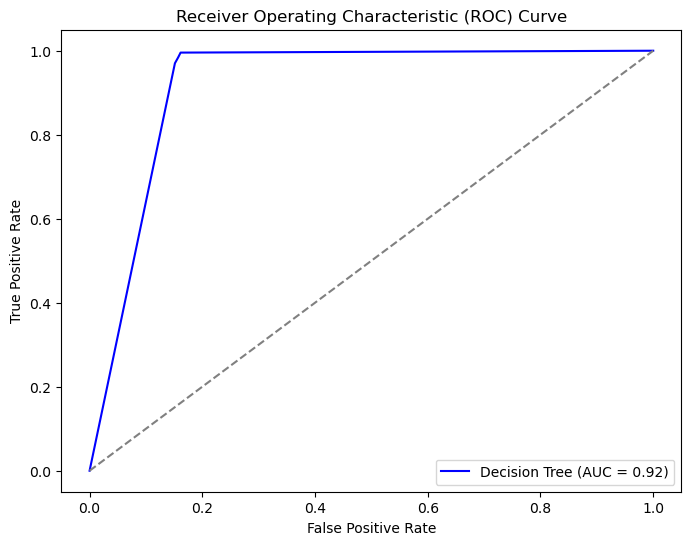

Optimized Decision Tree Performance:

Optimized Accuracy: 0.855657542035578
Optimized Precision: 0.42981326464906633
Optimized Recall: 0.9955257270693513
Optimized F1 Score: 0.6004047672588262
Optimized ROC AUC: 0.9199844399715311
Confusion Matrix:
 [[9199 1771]
 [   6 1335]]


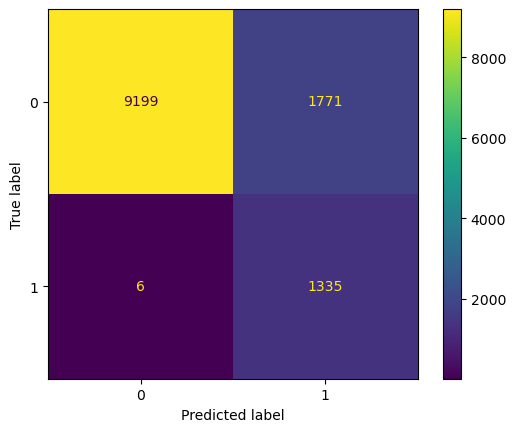

In [113]:
dt_optimized = DecisionTreeClassifier(max_depth=14, 
                                      min_samples_split=2, 
                                      min_samples_leaf=1, 
                                      criterion='gini',
                                      class_weight='balanced',
                                      random_state=9).fit(X_train_scaled_df, y_train)


# Evaluate the model
y_probability_optimized = dt_optimized.predict_proba(X_test_scaled_df)[:, 1]

fpr3, tpr3, _ = roc_curve(y_test, y_probability_optimized)
roc_auc = roc_auc_score(y_test, y_probability_optimized)


# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='blue', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('./images/optimized_ROC_Curve.png')
plt.show()

y_pred_optimized = dt_optimized.predict(X_test_scaled_df)
# y_pred_optimized = (y_probability_optimized >= 0.6).astype(int)

print("Optimized Decision Tree Performance:\n")
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized)}")
print(f"Optimized Precision: {precision_score(y_test, y_pred_optimized)}")
print(f"Optimized Recall: {recall_score(y_test, y_pred_optimized)}")
print(f"Optimized F1 Score: {f1_score(y_test, y_pred_optimized)}")
print(f"Optimized ROC AUC: {roc_auc}")

print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred_optimized)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimized)


[Text(0.8837826377467105, 0.96875, 'stop_resolution_Field Contact <= 0.029\ngini = 0.5\nsamples = 49244\nvalue = [24622.0, 24622.0]\nclass = NO Arrest'),
 Text(0.8750107079221491, 0.90625, 'stop_resolution_Offense Report <= 0.558\ngini = 0.43\nsamples = 25332\nvalue = [11204.775, 24622.0]\nclass = Arrest'),
 Text(0.8352736088267544, 0.84375, 'stop_resolution_Referred for Prosecution <= 4.525\ngini = 0.246\nsamples = 12708\nvalue = [4121.342, 24622.0]\nclass = Arrest'),
 Text(0.7821152001096491, 0.78125, 'subject_perceived_race_Hispanic <= 2.873\ngini = 0.232\nsamples = 12128\nvalue = [3797.021, 24612.818]\nclass = Arrest'),
 Text(0.7415878563596491, 0.71875, 'stop_resolution_Citation / Infraction <= 8.367\ngini = 0.223\nsamples = 11794\nvalue = [3609.611, 24612.818]\nclass = Arrest'),
 Text(0.6868489583333334, 0.65625, 'subject_perceived_race_Multi-Racial <= 4.375\ngini = 0.219\nsamples = 11626\nvalue = [3515.344, 24612.818]\nclass = Arrest'),
 Text(0.6036869517543859, 0.59375, 'frisk_

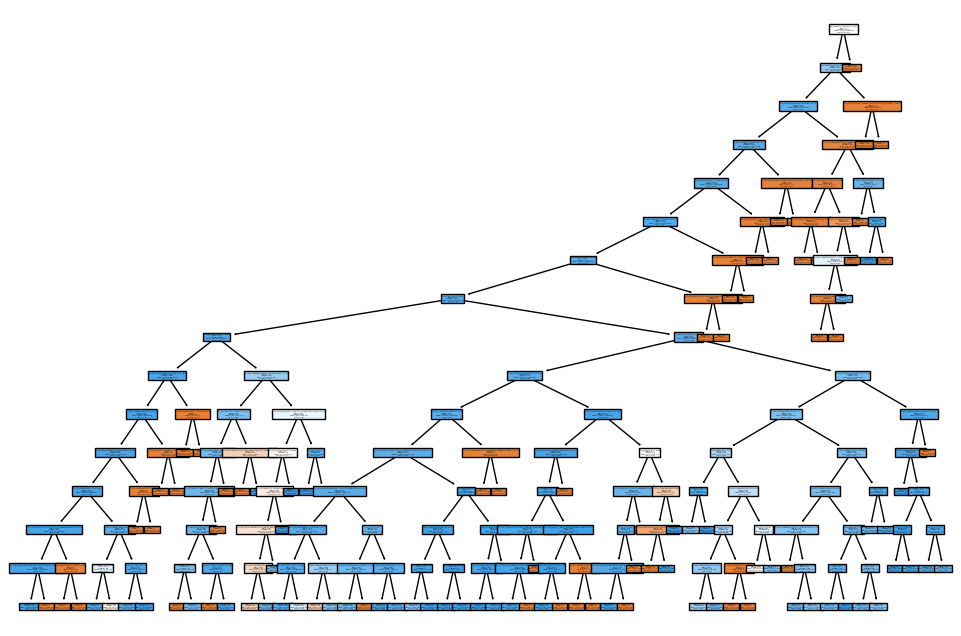

In [77]:
plt.figure(figsize=(12,8))

tree.plot_tree(dt_optimized, feature_names=X_train_scaled_df.columns, class_names=['NO Arrest', 'Arrest'], filled=True)

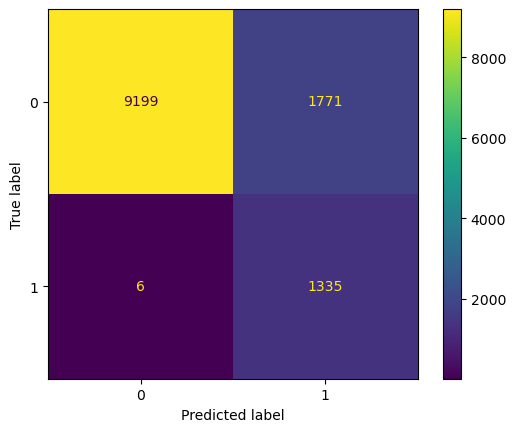

In [78]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimized)
plt.savefig('./images/confusion_matrix.png')

I'll create a subet focusing on **Suspicious categories** within the **Initial Call Type** Column. This goes back to our business problem where we want to know if stops led to an Arrest. 

Our initial model was able to predict True Postive Cases very well where it will predict if a stop leed or leads to an arrest.

We have a 9112 rows, 8424 instances where there was **'No Arrest':0** and 688 instances where an **'Arrest': 1** was made 

In [119]:
suspicious_rows['Arrest Flag']

10       0
17       0
21       0
26       0
28       0
        ..
61518    0
61530    0
61534    0
61552    0
61553    0
Name: Arrest Flag, Length: 9112, dtype: int32

In [120]:
print(suspicious_rows['Arrest Flag'].value_counts())
print()
print(suspicious_rows['Arrest Flag'].value_counts(normalize=True))

Arrest Flag
0    8424
1     688
Name: count, dtype: int64

Arrest Flag
0    0.924495
1    0.075505
Name: proportion, dtype: float64


In [121]:
suspicious_rows[suspicious_rows['Arrest Flag'] == 1]

Subject Age Group   Subject ID     GO / SC Num  Terry Stop ID  \
79              46 - 55   7728281151  20190000327584    10046252491   
242             26 - 35  33402572267  20200000113510    12805603402   
446             36 - 45  11714916991  20200000073624    12662034397   
457              1 - 17  53074543169  20230000329931    53262900808   
498             26 - 35  12784209788  20200000101590    12784279732   
...                 ...          ...             ...            ...   
61083           18 - 25   7731779543  20240000108547    55642068980   
61239           26 - 35  32001437838  20240000044413    54205687769   
61255           36 - 45  33158952022  20190000416453    11695361924   
61326           36 - 45  12795682334  20200000037553    12595508451   
61494           26 - 35  13074975602  20230000158754    50969336645   

      Stop Resolution Weapon Type Officer ID  Officer YOB Officer Gender  \
79             Arrest         NaN       7758         1987              M   
242            Arrest         NaN       8556         1995              M   
446            Arrest         NaN       8404         1984              M   
457            Arrest         NaN       8725         1987              M   
498            Arrest         NaN       8486         1992              M   
...               ...         ...        ...          ...            ...   
61083          Arrest     Handgun       8725         1987              M   
61239          Arrest         NaN       8854         1976              M   
61255          Arrest         NaN       7456         1979              M   
61326          Arrest         NaN       8615         1987              M   
61494          Arrest     Handgun       8769         1995              M   

             Officer Race  ...     Reported Time  \
79                  White  ...  11:25:41.0000000   
242                 White  ...  11:53:54.0000000   
446                 White  ...  20:04:39.0000000   
457                 White  ...  12:34:11.0000000   
498                 Asian  ...  16:48:27.0000000   
...                   ...  ...               ...   
61083               White  ...  19:18:43.0000000   
61239               White  ...  14:21:55.0000000   
61255               White  ...  13:22:14.0000000   
61326            Hispanic  ...  03:32:05.0000000   
61494  Declined to Answer  ...  09:33:34.0000000   

                                Initial Call Type  \
79        SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
242       SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
446       SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
457       SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
498    SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
...                                           ...   
61083  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
61239  SUSPICIOUS STOP - OFFICER INITIATED ONVIEW   
61255     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61326     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   
61494     SUSPICIOUS PERSON, VEHICLE, OR INCIDENT   

                                    Final Call Type Call Type  \
79     --DV - ENFORCE COURT ORDER (ARREST MANDATED)    ONVIEW   
242                             --THEFT - CAR PROWL       911   
446                     --WARRANT SERVICES - FELONY    ONVIEW   
457                      --AUTOMOBILES - AUTO THEFT       911   
498        --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    ONVIEW   
...                                             ...       ...   
61083                   --WEAPON, PERSON WITH - GUN    ONVIEW   
61239                     --NARCOTICS - NARS REPORT    ONVIEW   
61255                   --WARRANT SERVICES - FELONY    ONVIEW   
61326             --BURGLARY - RESIDENTIAL OCCUPIED       911   
61494     --SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE    ONVIEW   

                                       Officer Squad Arrest Flag Frisk Flag  \
79             EAST PCT 1ST W - E/G RELIEF (CHARLIE)           1          N   
242               WEST PCT 1ST W - DAVI

In [122]:
features

['Initial Call Type',
 'Stop Resolution',
 'Officer Gender',
 'Officer Race',
 'Subject Perceived Gender',
 'Subject Perceived Race',
 'Frisk Flag']

In [123]:
# suspicious_rows = suspicious_rows[(suspicious_rows['Stop Resolution'] == 'Arrest') & (suspicious_rows['Frisk Flag'] == 'Y')]
# suspicious_rows

In [288]:
X_stops = suspicious_rows[features]
# X_stops = suspicious_rows[['Initial Call Type','Frisk Flag','Officer Gender', 'Subject Perceived Gender','Officer Race','Subject Perceived Race']]

y_stops = suspicious_rows['Arrest Flag']

X_train_stops, X_test_stops, y_train_stops, y_test_stops = train_test_split(X_stops, y_stops, random_state=42, test_size=0.2)




In [289]:
X_train_stops.value_counts()

Initial Call Type                           Stop Resolution  Officer Gender  Officer Race                               Subject Perceived Gender  Subject Perceived Race            Frisk Flag
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW  Field Contact    M               White                                      Male                      White                             N             585
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT     Field Contact    M               White                                      Male                      White                             N             318
                                            Offense Report   M               White                                      Male                      White                             N             259
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW  Field Contact    M               White                                      Male                      Black or African American         N             251
                 

In [290]:
X_train_stops = reformat_columns(X_train_stops)
X_test_stops = reformat_columns(X_test_stops)
y_train_stops = reformat_columns(y_train_stops)
y_test_stops = reformat_columns(y_test_stops)



In [291]:
print(X_train_stops.columns)
print(X_test_stops.columns)
print(y_train_stops.name)
print(y_test_stops.name)

Index(['initial_call_type', 'stop_resolution', 'officer_gender',
       'officer_race', 'subject_perceived_gender', 'subject_perceived_race',
       'frisk_flag'],
      dtype='object')
Index(['initial_call_type', 'stop_resolution', 'officer_gender',
       'officer_race', 'subject_perceived_gender', 'subject_perceived_race',
       'frisk_flag'],
      dtype='object')
arrest_flag
arrest_flag


In [292]:
imputer.fit(X_train_stops)


# transform the features
X_train_stops_imputed = imputer.fit_transform(X_train_stops)
X_test_stops_imputed = imputer.transform(X_test_stops)

X_train_stops_imputed_df = pd.DataFrame(X_train_stops_imputed,
                                columns=X_train_stops.columns, 
                                index=X_train_stops.index
                                )


X_test_stops_imputed_df = pd.DataFrame(X_test_stops_imputed, 
                                columns=X_test_stops.columns, 
                                index=X_test_stops.index
                                )

In [293]:
X_train_stops_encoded, X_test_stops_enconded, stops_encoded_df = one_hot_encode(X_train_stops, X_test_stops)


In [294]:
X_train_stops_scaled = scaler.fit_transform(X_train_stops_encoded, y_train_stops)

X_test_stops_scaled = scaler.transform(X_test_stops_enconded)

X_train_stops_scaled_df = pd.DataFrame(X_train_stops_scaled, 
                                 columns=X_train_stops_encoded.columns,
                                 index=X_train_stops_encoded.index
                                 )
X_test_stops_scaled_df = pd.DataFrame(X_test_stops_scaled,
                                      columns=X_test_stops_enconded.columns,
                                      index=X_test_stops_enconded.index
                                      )

In [295]:
print(y_train_stops.value_counts())
print(y_train_stops.value_counts(normalize=True))

arrest_flag
0    6750
1     539
Name: count, dtype: int64
arrest_flag
0    0.926053
1    0.073947
Name: proportion, dtype: float64


In [296]:
X_train_stops_scaled_df.corrwith(y_train_stops)

initial_call_type_SUSPICIOUS PERSON, VEHICLE, OR INCIDENT                             0.018199
initial_call_type_SUSPICIOUS STOP - OFFICER INITIATED ONVIEW                         -0.020805
stop_resolution_Citation / Infraction                                                -0.017548
stop_resolution_Field Contact                                                        -0.303388
stop_resolution_Offense Report                                                       -0.162656
stop_resolution_Referred for Prosecution                                             -0.026596
officer_gender_M                                                                      0.015480
officer_race_American Indian/Alaska Native                                           -0.004681
officer_race_Asian                                                                   -0.011572
officer_race_Black or African American                                                0.004369
officer_race_Declined to Answer                   

Stop Accuracy: 88.37%
Stop Precision: 41.27%
Stops Recall: 100.00%
Stop F1: 58.43%
AUC: 94.80%


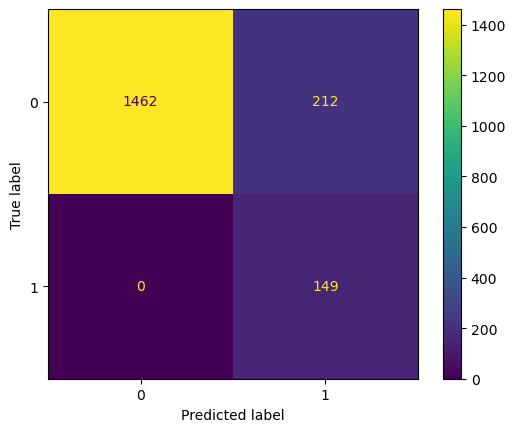

In [297]:
baseline_model_stops = LogisticRegression(random_state=33, max_iter=1000, class_weight='balanced')

baseline_model_stops.fit(X_train_stops_scaled_df, y_train_stops)
# baseline_model_stops.fit(X_train_stops, y_train_stops)

y_pred_stops = baseline_model_stops.predict(X_test_stops_scaled_df)

# Probabilities
y_test_stop_probabilites = baseline_model_stops.predict_proba(X_test_stops_scaled_df)[:,1]

false_positive_stop, true_positive_stop, _ = roc_curve(y_test_stops, y_test_stop_probabilites)

roc_auc_stops = auc(false_positive_stop, true_positive_stop)


baseline_model_stops_accuracy = accuracy_score(y_test_stops, y_pred_stops)
baseline_model_stops_precision = precision_score(y_test_stops, y_pred_stops)
baseline_model_stops_recall = recall_score(y_test_stops, y_pred_stops)
baseline_model_stops_f1 = f1_score(y_test_stops, y_pred_stops)



print(f'Stop Accuracy: {baseline_model_stops_accuracy * 100:.2f}%')
print(f'Stop Precision: {baseline_model_stops_precision * 100:.2f}%')
print(f'Stops Recall: {baseline_model_stops_recall * 100:.2f}%')
print(f'Stop F1: {baseline_model_stops_f1 * 100:.2f}%')
print(f'AUC: {roc_auc_stops * 100:.2f}%')

ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_stops)



Our base model predicts 

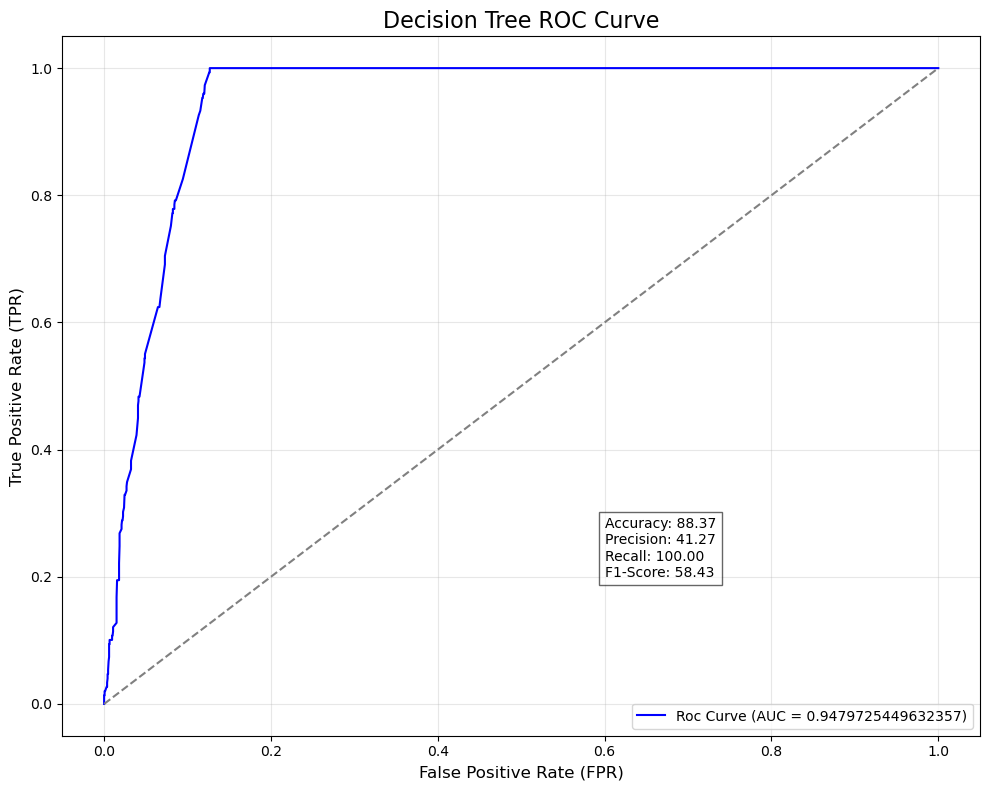

In [298]:
plt.figure(figsize=(10,8))

plt.plot(false_positive_stop, true_positive_stop, color='blue', label=f'Roc Curve (AUC = {roc_auc_stops})')
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

metrics_text = (f'Accuracy: {baseline_model_stops_accuracy * 100:.2f}\n'
                f'Precision: {baseline_model_stops_precision * 100:.2f}\n'
                f'Recall: {baseline_model_stops_recall * 100:.2f}\n'
                f'F1-Score: {baseline_model_stops_f1 * 100:.2f}'
                )

plt.text(0.6,0.2, metrics_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()

The subset baseline model is able to predict 0 False Negatives, meaning that it's recording arrests accurately. Having a Recall of 100% also provides predictions for True positive cases. All arrests are actually arrests by officers.

Training: 0.9260529565098093
Test: 0.918266593527153

DT Accuracy: 0.8776741634668129
DT Precision: 0.40053763440860213
DT Recall: 1.0
DT F1: 0.5719769673704415

[[1451  223]
 [   0  149]]


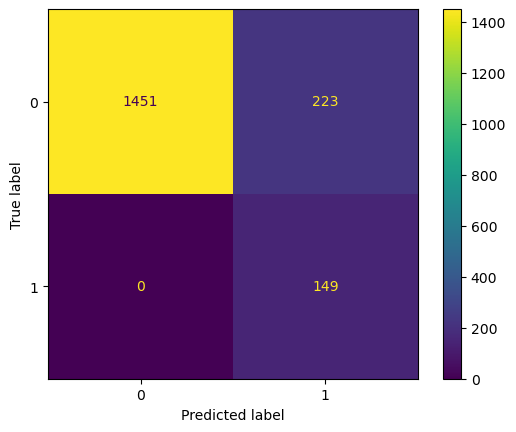

In [299]:
dt_stops = DecisionTreeClassifier(random_state=33, 
                                  criterion='gini', 
                                  max_depth=5,
                                  class_weight='balanced').fit(X_train_stops_scaled_df, 
                                                   y_train_stops)

y_pred_dt_stop = dt_stops.predict(X_test_stops_scaled_df)

dt_stop_accuracy = accuracy_score(y_test_stops, y_pred_dt_stop)
dt_stop_precision = precision_score(y_test_stops, y_pred_dt_stop)
dt_stop_recall = recall_score(y_test_stops, y_pred_dt_stop)
dt_stop_f1 = f1_score(y_test_stops, y_pred_dt_stop)


print(f"Training: {dt_stops.score(X_train_stops_encoded, y_train_stops)}")
print(f"Test: {dt_stops.score(X_test_stops_enconded, y_test_stops)}")
print()
print(f'DT Accuracy: {dt_stop_accuracy}')
print(f'DT Precision: {dt_stop_precision}')
print(f'DT Recall: {dt_stop_recall}')
print(f'DT F1: {dt_stop_f1}\n')
print(confusion_matrix(y_test_stops, y_pred_dt_stop))

ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_dt_stop)

In [300]:
cv_stop_scores = cross_val_score(dt_stops, 
                                 X_train_stops_scaled_df, 
                                 y_train_stops, cv=5, scoring='recall')
print(f"Cross-validated accuracy score: {cv_stop_scores}")
print(f"Mean Score: {cv_stop_scores.mean()}")
print(f"Standard Deviation scores: {cv_stop_scores.std()}")

Cross-validated accuracy score: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation scores: 0.0


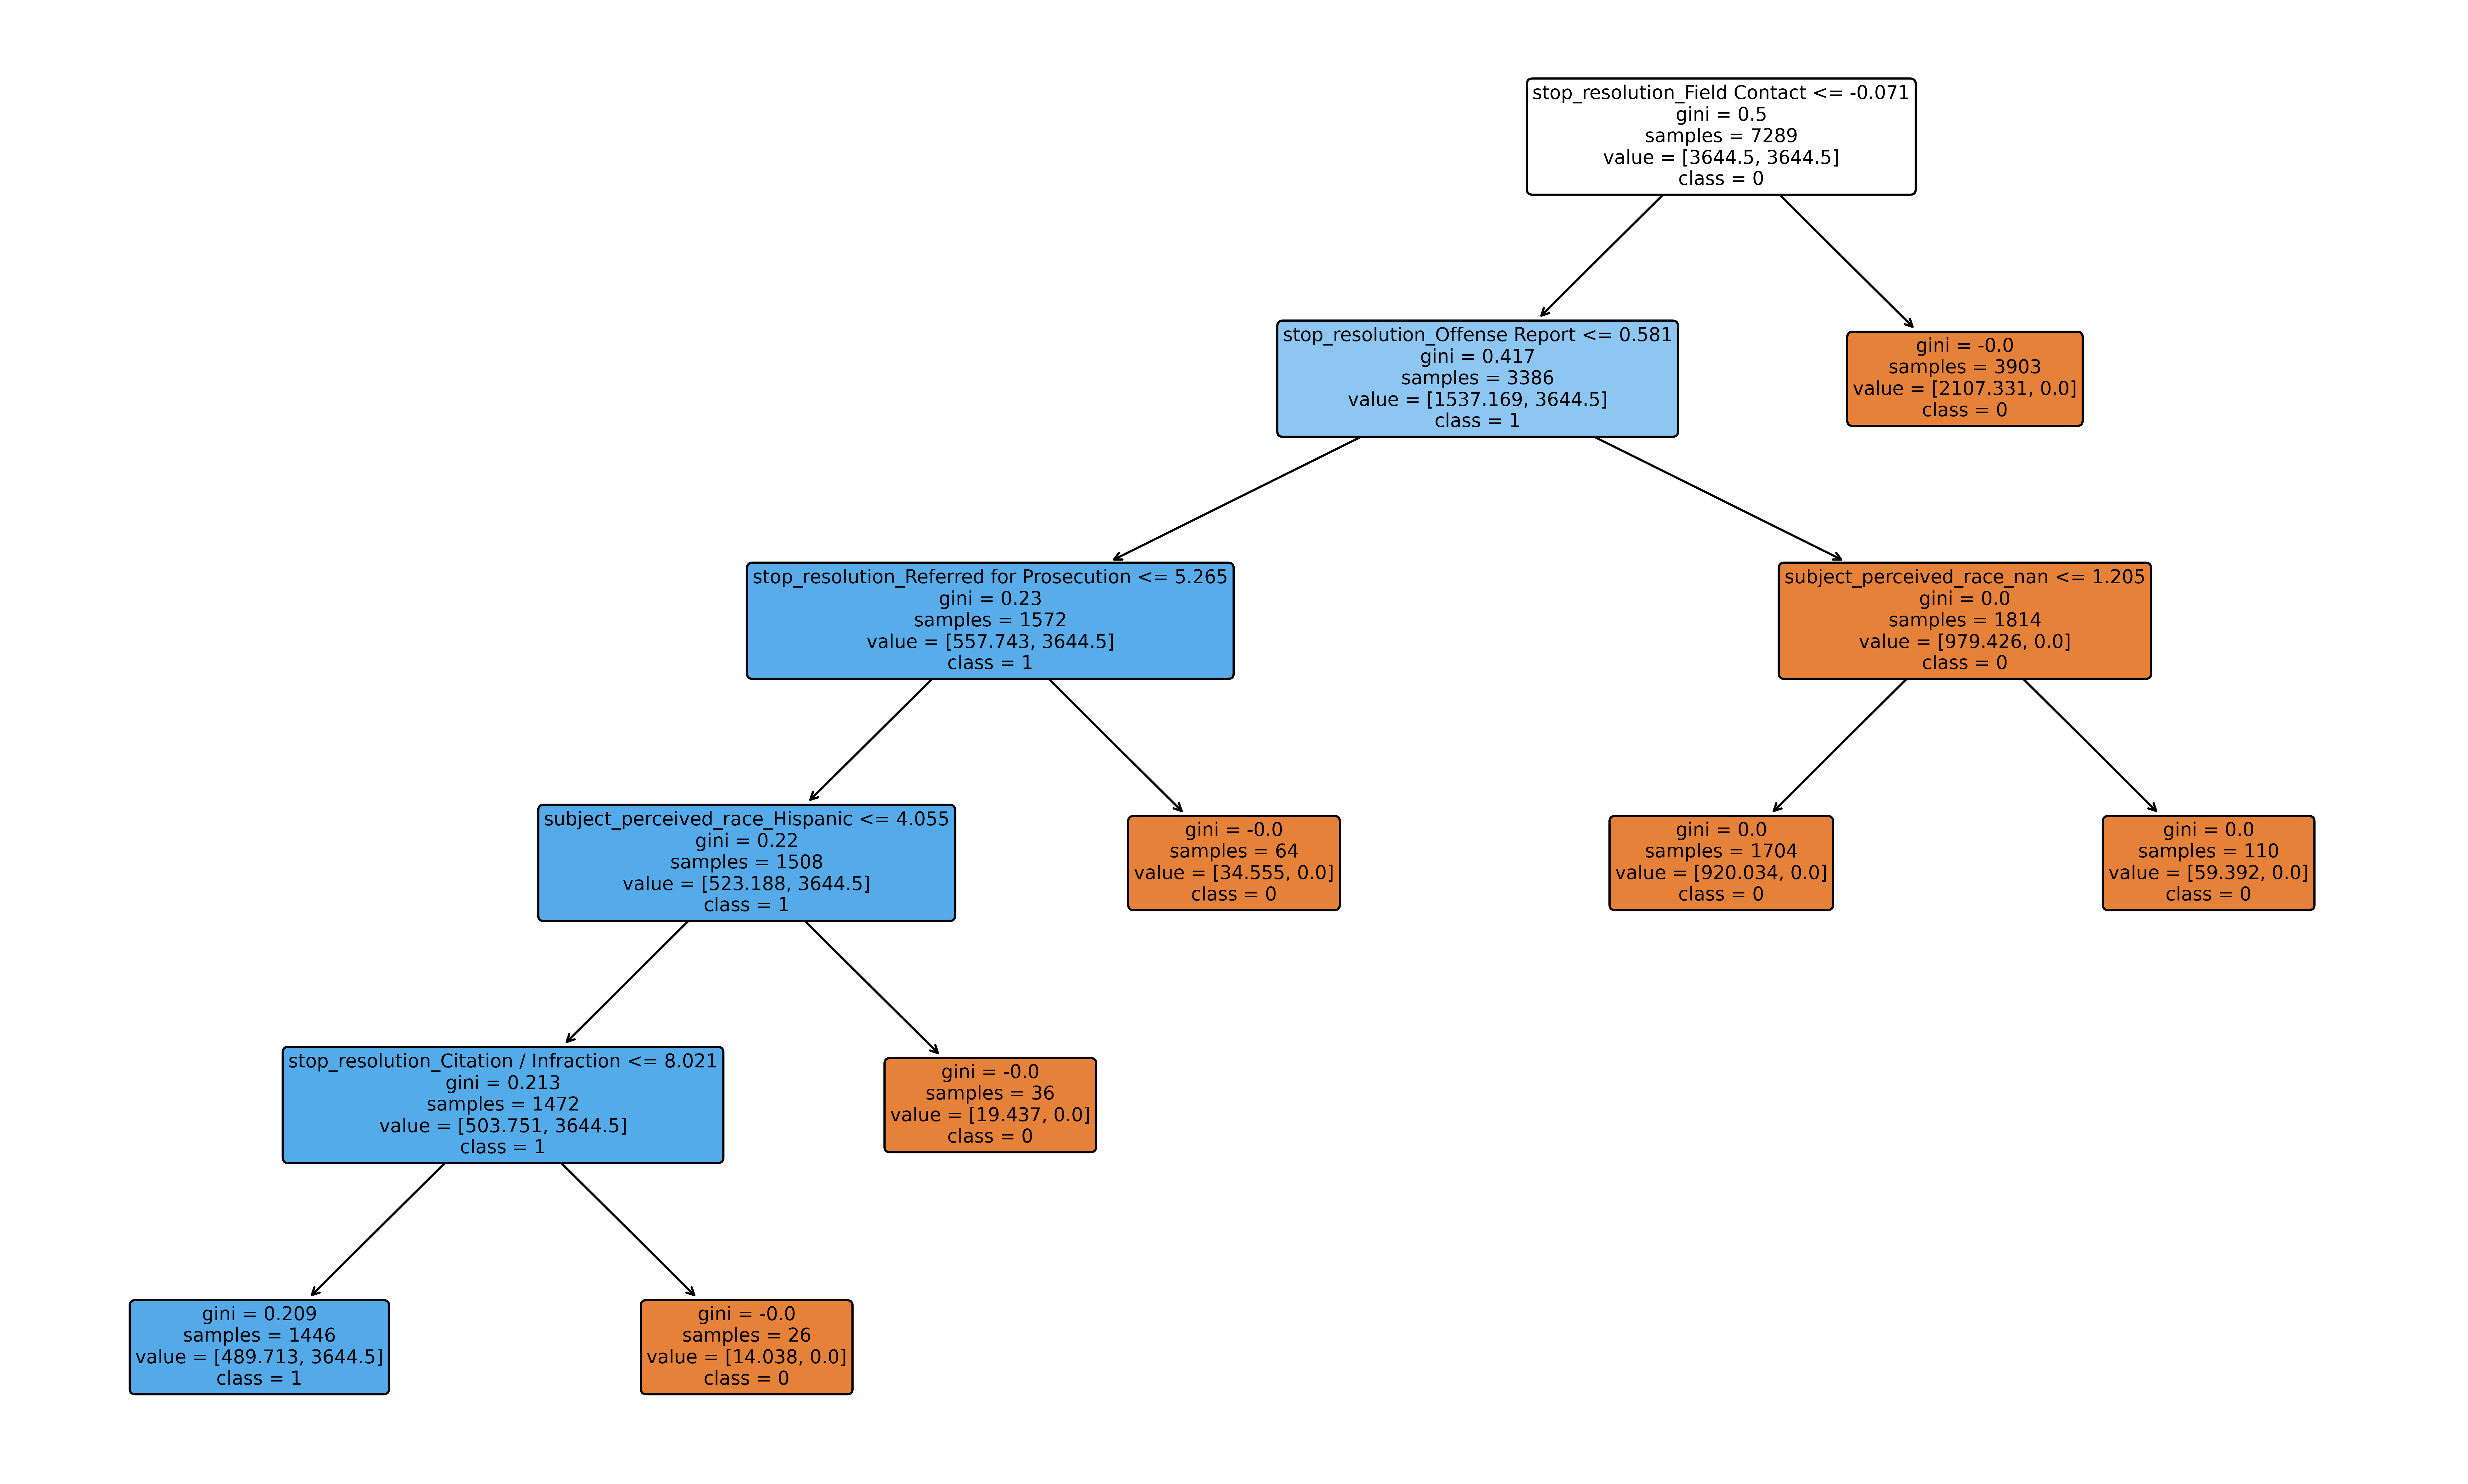

In [301]:
# from sklearn import tree
plt.figure(figsize=(20,12), dpi=500)
tree.plot_tree(dt_stops,
              feature_names=X_train_stops_encoded.columns,
              class_names=np.unique(y_train_stops).astype('str'),
              filled=True,
              rounded=True,
              max_depth=5)
plt.savefig('./images/DecisionTree_subset_plot_tree.png')
plt.show()

In [276]:
best_stops_f1 = -np.inf
best_stops_params = {}

# Iterate over the combinations of hyperparameters
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            
            # Instantiate and train the model with the current set of hyperparameters
            stop_model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                class_weight='balanced',
                random_state=33
            ).fit(
                X_train_stops_scaled_df,
                y_train_stops
            )
            
            y_stops_prediction = stop_model.predict(X_test_stops_scaled_df)
            
            f1 = f1_score(y_test_stops, y_stops_prediction)
            
            if f1 > best_stops_f1:
                best_stops_f1 = f1
                best_stops_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

# Print the best F1-Score and Parameters
print(f'Best F1-Score: {best_stops_f1}')
print(f'Best Parameters: {best_stops_params}')


Best F1-Score: 0.1917808219178082
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [277]:
depth_values = np.arange(1,20)
train_depth_aucs = []
test_depth_aucs = []

for depth in depth_values:
    #Intialize predicted probabilities for training and test sets
    clf_depth = DecisionTreeClassifier(max_depth=depth, random_state=33, class_weight='balanced')
    clf_depth.fit(X_train_stops_scaled_df, y_train_stops)
    
    # Get predicted probabilities for training and test sets
    y_train_stop_pred = clf_depth.predict(X_train_stops_scaled_df)
    y_test_stop_pred = clf_depth.predict(X_test_stops_scaled_df)
    
    y_train_stop_prob = clf_depth.predict_proba(X_train_stops_scaled_df)[:,1]
    y_test_stop_prob = clf_depth.predict_proba(X_test_stops_scaled_df)[:,1]
    
    # Calculate FPR (False Positive Rate), TPR(True Positive Rate) and test sets using roc_curve
    fpr_depth_train, tpr_depth_train, _ = roc_curve(y_train_stops, y_train_stop_prob)
    fpr_depth_test, tpr_depth_test, _ = roc_curve(y_test_stops, y_test_stop_prob)
    
    # Calculate AUC absed on FPR and TPR using auc
    train_depth_auc = auc(fpr_depth_train, tpr_depth_train)
    test_depth_auc = auc(fpr_depth_test, tpr_depth_test)
    
    # Append AUC to the list
    train_depth_aucs.append(train_depth_auc)
    test_depth_aucs.append(test_depth_auc)

    print(f"Max Depth: {depth}, Precision Score: {precision_score(y_test_stops, y_test_stop_pred)} Recall-Score: {recall_score(y_test_stops, y_test_stop_pred)}")
    

# PLot the figure
# plt.figure(figsize=(10,8))
# plt.plot(max_depth_values, train_depth_aucs, label="Train AUC", marker="o")
# plt.plot(max_depth_values, test_depth_aucs, label="Test AUC", marker="o")
# plt.xlabel("Max Depth")
# plt.ylabel("AUC Scores")
# plt.legend()
# plt.show()



Max Depth: 1, Precision Score: 0.14012738853503184 Recall-Score: 0.2953020134228188
Max Depth: 2, Precision Score: 0.14426229508196722 Recall-Score: 0.2953020134228188
Max Depth: 3, Precision Score: 0.1423841059602649 Recall-Score: 0.28859060402684567
Max Depth: 4, Precision Score: 0.1320754716981132 Recall-Score: 0.3288590604026846
Max Depth: 5, Precision Score: 0.13535911602209943 Recall-Score: 0.3288590604026846
Max Depth: 6, Precision Score: 0.13424657534246576 Recall-Score: 0.3288590604026846
Max Depth: 7, Precision Score: 0.1348973607038123 Recall-Score: 0.3087248322147651
Max Depth: 8, Precision Score: 0.11124694376528117 Recall-Score: 0.610738255033557
Max Depth: 9, Precision Score: 0.12343096234309624 Recall-Score: 0.3959731543624161
Max Depth: 10, Precision Score: 0.12473118279569892 Recall-Score: 0.38926174496644295
Max Depth: 11, Precision Score: 0.09547123623011015 Recall-Score: 0.5234899328859061
Max Depth: 12, Precision Score: 0.10135135135135136 Recall-Score: 0.50335570

Max Depth: 5, Precision Score: 0.09194583036350677, Recall Score: 0.8657718120805369
Max Depth: 6, Precision Score: 0.08897485493230174, Recall Score: 0.9261744966442953
Max Depth: 7, Precision Score: 0.08926261319534282, Recall Score: 0.9261744966442953
Max Depth: 8, Precision Score: 0.08746736292428199, Recall Score: 0.8993288590604027
Max Depth: 9, Precision Score: 0.08719723183391004, Recall Score: 0.8456375838926175
Max Depth: 10, Precision Score: 0.08768406961178045, Recall Score: 0.8791946308724832
Max Depth: 11, Precision Score: 0.08523908523908524, Recall Score: 0.825503355704698
Max Depth: 12, Precision Score: 0.08350877192982456, Recall Score: 0.7986577181208053
Max Depth: 13, Precision Score: 0.08356940509915015, Recall Score: 0.7919463087248322
Max Depth: 14, Precision Score: 0.08483105679367361, Recall Score: 0.7919463087248322
Max Depth: 15, Precision Score: 0.08507570295602018, Recall Score: 0.7919463087248322


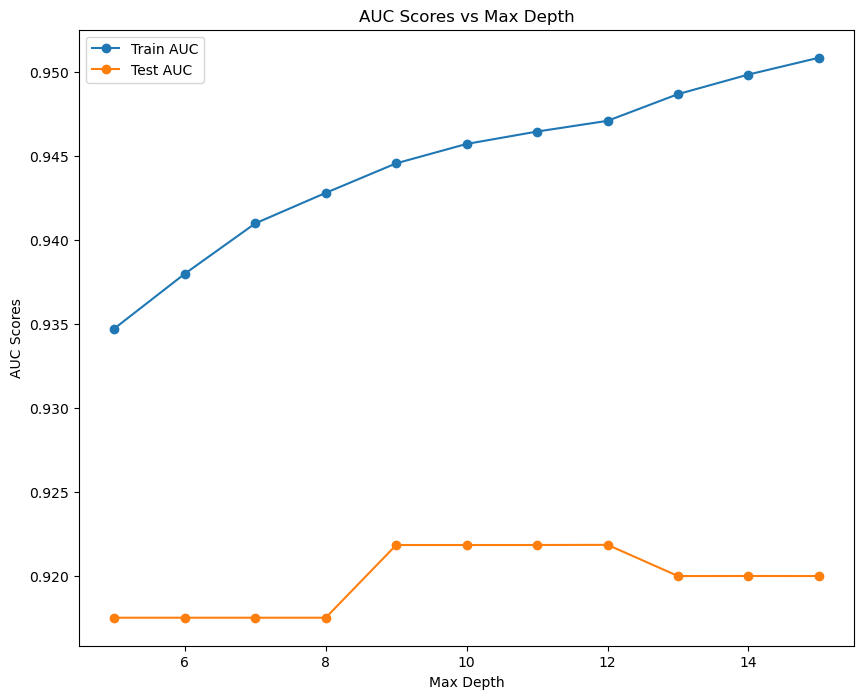

In [278]:
# depth_values = np.arange(1,50)
train_auc_stop_threshold = []
test_auc_stop_threshold = []


for depth in max_depth_values:
    #Intialize predicted probabilities for training and test sets
    clf_stop_depth = DecisionTreeClassifier(max_depth=depth, random_state=3, class_weight='balanced')
    clf_stop_depth.fit(X_train_stops_scaled_df, y_train_stops)
    
    # Get predicted probabilities for training and test sets, chagning the threshold
   
    y_train_prob2 = clf_stop_depth.predict_proba(X_train_stops_scaled_df)[:,1]
    y_test_prob2 = clf_stop_depth.predict_proba(X_test_stops_scaled_df)[:,1]
    y_train_pred2 = (y_train_prob2 >= 0.4).astype(int)
    y_test_pred2 = (y_test_prob2 >= 0.4).astype(int)
    
    # Calculate FPR (False Positive Rate), TPR(True Positive Rate) and test sets using roc_curve
    fpr_train_stop_depth, tpr_train_stop_depth, _ = roc_curve(y_train_stops, y_train_prob2)
    fpr_test_stop_depth, tpr_test_stop_depth, _ = roc_curve(y_test_stops, y_test_prob2)
    
    # Calculate AUC absed on FPR and TPR using auc
    train_auc_stop_depth = auc(fpr_train_stop_depth, tpr_train_stop_depth)
    test_auc_stop_depth = auc(fpr_test_stop_depth, tpr_test_stop_depth)
    
    # Append AUC to the list
    train_auc_stop_threshold.append(train_auc_stop_depth)
    test_auc_stop_threshold.append(test_auc_stop_depth)
    

    print(f"Max Depth: {depth}, Precision Score: {precision_score(y_test_stops, y_test_pred2)}, Recall Score: {recall_score(y_test_stops, y_test_pred2)}")
    

# PLot the figure
plt.figure(figsize=(10,8))
plt.plot(max_depth_values, train_auc_threshold, label="Train AUC", marker="o")
plt.plot(max_depth_values, test_auc_threshold, label="Test AUC", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("AUC Scores")
plt.title('AUC Scores vs Max Depth')
plt.legend()
plt.savefig('./images/Max_depths.png')
plt.show()


Min Sample: 2, Precision Score: 0.10414052697616061, F1-Score: 0.17547568710359407
Min Sample: 3, Precision Score: 0.10362047440699126, F1-Score: 0.17473684210526316
Min Sample: 4, Precision Score: 0.10375, F1-Score: 0.1749209694415174
Min Sample: 5, Precision Score: 0.10323383084577115, F1-Score: 0.17418677859391396
Min Sample: 6, Precision Score: 0.10297766749379653, F1-Score: 0.17382198952879582
Min Sample: 7, Precision Score: 0.1031055900621118, F1-Score: 0.1740041928721174
Min Sample: 8, Precision Score: 0.10297766749379653, F1-Score: 0.17382198952879582
Min Sample: 9, Precision Score: 0.10272277227722772, F1-Score: 0.17345872518286312
Min Sample: 10, Precision Score: 0.10246913580246914, F1-Score: 0.17309697601668406


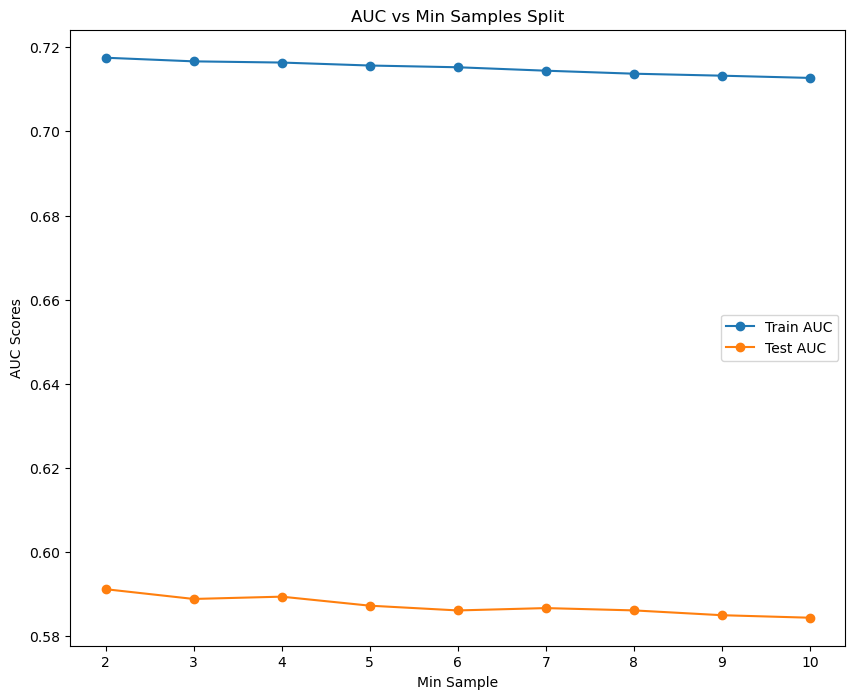

In [279]:
train_split_auc = []
test_split_auc = []

for split in min_sample_splits_value:
    clf_stop_split = DecisionTreeClassifier(random_state=33, min_samples_split=split,class_weight='balanced')
    clf_stop_split.fit(X_train_stops_scaled_df, y_train_stops)
    
    #predict
    y_train_split_prob = clf_stop_split.predict_proba(X_train_stops_scaled_df)[:,1]
    y_test_split_prob = clf_stop_split.predict_proba(X_test_stops_scaled_df)[:,1]
    
    y_train_split_pred = clf_stop_split.predict(X_train_stops_scaled_df)
    y_test_split_pred = clf_stop_split.predict(X_test_stops_scaled_df)
    
    # Calculate TPR and FPR
    fpr_split_train, tpr_split_train, _ = roc_curve(y_train_stops, y_train_split_prob)
    fpr_split_test, tpr_split_test, _ = roc_curve(y_test_stops, y_test_split_prob)
    
    
    #Calculate AUC
    train_split = auc(fpr_split_train, tpr_split_train)
    test_split = auc(fpr_split_test, tpr_split_test)
    
    train_split_auc.append(train_split)
    test_split_auc.append(test_split)
    
    print(f"Min Sample: {split}, Precision Score: {precision_score(y_test_stops, y_test_split_pred)}, F1-Score: {f1_score(y_test_stops, y_test_split_pred)}")


# PLot the figure
plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value, train_split_auc, label="Train AUC", marker="o")
plt.plot(min_sample_splits_value, test_split_auc, label="Test AUC", marker="o")
plt.xlabel("Min Sample")
plt.ylabel("AUC Scores")
plt.title("AUC vs Min Samples Split")
plt.legend()
plt.show()    

Min Sample Split: 2, Precision_Score: 0.0885, Recall Score: 0.7785234899328859
Min Sample Split: 3, Precision_Score: 0.0883, Recall Score: 0.7785234899328859
Min Sample Split: 4, Precision_Score: 0.0883, Recall Score: 0.7785234899328859
Min Sample Split: 5, Precision_Score: 0.0881, Recall Score: 0.7785234899328859
Min Sample Split: 6, Precision_Score: 0.0879, Recall Score: 0.7785234899328859
Min Sample Split: 7, Precision_Score: 0.0879, Recall Score: 0.7785234899328859
Min Sample Split: 8, Precision_Score: 0.0879, Recall Score: 0.7785234899328859
Min Sample Split: 9, Precision_Score: 0.0877, Recall Score: 0.7785234899328859
Min Sample Split: 10, Precision_Score: 0.0876, Recall Score: 0.7785234899328859


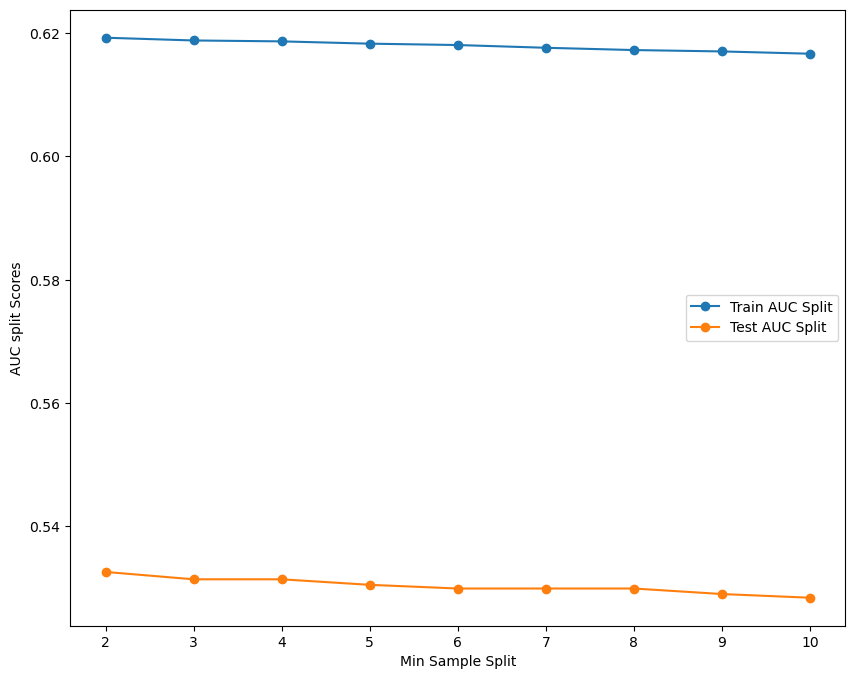

In [280]:
train_auc_stops_splits_thresh2 = []
test_auc_stops_splits_thresh2 = []


for split in min_sample_splits_value:
    clf_stop_split2 = DecisionTreeClassifier(min_samples_split=split, random_state=3, class_weight='balanced')
    clf_stop_split2.fit(X_train_stops_scaled_df, y_train_stops)

    # y_train_preds = clf_split.predict(X_train_encoded_df)
    # y_test_preds = clf_split.predict(X_test_encoded_df)
    y_train_stop_probs2 = clf_stop_split2.predict_proba(X_train_stops_scaled_df)[:,1]
    y_test_stop_probs2 = clf_stop_split2.predict_proba(X_test_stops_scaled_df)[:,1]
    
    y_train_stop_preds2 = (y_train_stop_probs2 >= 0.4).astype(int)
    y_test_stop_preds2 = (y_test_stop_probs2 >= 0.4).astype(int)

    fpr_train_stop_split2, tpr_train_stop_split2, _ = roc_curve(y_train_stops, y_train_stop_preds2)
    fpr_test_stop_split2, tpr_test_stop_split2, _ = roc_curve(y_test_stops, y_test_stop_preds2)

    train_auc_stop_split2 = auc(fpr_train_stop_split2, tpr_train_stop_split2)
    test_auc_stop_split2 = auc(fpr_test_stop_split2, tpr_test_stop_split2)
    
    train_auc_stops_splits_thresh2.append(train_auc_stop_split2)
    test_auc_stops_splits_thresh2.append(test_auc_stop_split2)
    print(f"Min Sample Split: {split}, Precision_Score: {precision_score(y_test_stops, y_test_stop_preds2):.4f}, Recall Score: {recall_score(y_test_stops, y_test_stop_preds2)}")


plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value,  train_auc_stops_splits_thresh2, label="Train AUC Split", marker="o")
plt.plot(min_sample_splits_value,  test_auc_stops_splits_thresh2, label="Test AUC Split", marker="o")
plt.xlabel("Min Sample Split")
plt.ylabel("AUC split Scores")
plt.legend()
plt.savefig('./images/sample_splits.png')
plt.show()

Min Leaf: 1, Precision Score: 0.0, Recall Score: 0.0
Min Leaf: 2, Precision Score: 0.0, Recall Score: 0.0
Min Leaf: 3, Precision Score: 0.0, Recall Score: 0.0
Min Leaf: 4, Precision Score: 0.0, Recall Score: 0.0
Min Leaf: 5, Precision Score: 0.0, Recall Score: 0.0


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_clas

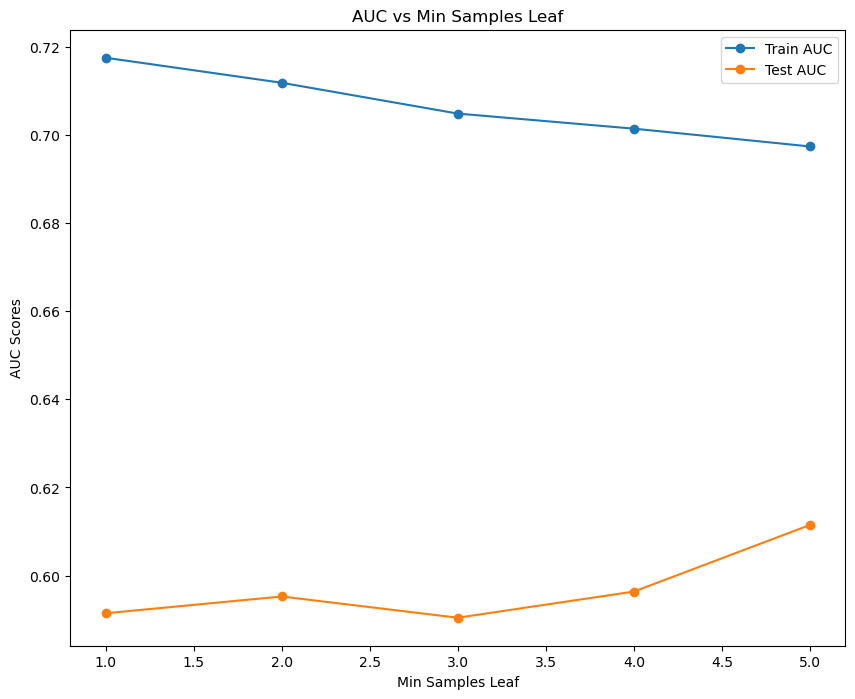

In [281]:
train_stop_leafs = []
test_stop_leafs = []

for leaf in min_sample_leafs_values:
    # Initialize DecisionTreeClassifier with the current min_samples_leaf value
    clf_stop_leaf = DecisionTreeClassifier(random_state=33, min_samples_leaf=leaf)
    clf_stop_leaf.fit(X_train_stops_scaled, y_train_stops)
    
    # Predicted probabilities for AUC calculation
    clf_stop_leaf_train_prob = clf_stop_leaf.predict_proba(X_train_stops_scaled)[:, 1]
    clf_stop_leaf_test_prob = clf_stop_leaf.predict_proba(X_test_stops_scaled)[:, 1]
    
    # Class predictions for precision and F1-score calculation
    clf_stop_leaf_train_pred = clf_stop_leaf.predict(X_train_stops_scaled)
    clf_stop_leaf_test_pred = clf_stop_leaf.predict(X_test_stops_scaled)
    
    # Compute ROC curve metrics
    fpr_stop_train_leaf, tpr_stop_train_leaf, _ = roc_curve(y_train_stops, clf_stop_leaf_train_prob)
    fpr_stop_test_leaf, tpr_stop_test_leaf, _ = roc_curve(y_test_stops, clf_stop_leaf_test_prob)
    
    # Compute AUC
    train_stop_leaf_auc = auc(fpr_stop_train_leaf, tpr_stop_train_leaf)
    test_stop_leaf_auc = auc(fpr_stop_test_leaf, tpr_stop_test_leaf)
    
    # Append AUC scores to respective lists
    train_stop_leafs.append(train_stop_leaf_auc)
    test_stop_leafs.append(test_stop_leaf_auc)
    
    # Print precision and F1-score
    
    print(f"Min Leaf: {leaf}, Precision Score: {precision_score(y_test_stops, clf_stop_leaf_test_pred)}, Recall Score: {recall_score(y_test_stops, clf_stop_leaf_test_pred)}")

# Plot AUC scores
plt.figure(figsize=(10, 8))
plt.plot(min_sample_leafs_values, train_stop_leafs, label="Train AUC", marker="o")
plt.plot(min_sample_leafs_values, test_stop_leafs, label="Test AUC", marker="o")
plt.xlabel("Min Samples Leaf")
plt.ylabel("AUC Scores")
plt.title("AUC vs Min Samples Leaf")
plt.legend()
plt.show()


In [282]:
train_auc_leafs2 = []
test_auc_leafs2 = []
for leaf in min_sample_leafs_values:
    #instantiate the classifier
    clf_stop_leaf2 = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=3)
    clf_stop_leaf2.fit(X_train_stops_encoded, y_train_stops)

    # y_train_leaf_pred = clf_leaf.predict(X_train_encoded_df)
    # y_test_leaf_pred = clf_leaf.predict(X_test_encoded_df)

    #predict probabilities
    y_train_leaf_pred_prob2 = clf_stop_leaf2.predict_proba(X_train_stops_encoded)[:,1]
    y_test_leaf_pred_prob2 = clf_stop_leaf2.predict_proba(X_test_stops_enconded)[:,1]
    
    y_train_leaf_pred2 = (y_train_leaf_pred_prob2 >= 0.4).astype(int)
    y_test_leaf_pred2 = (y_test_leaf_pred_prob2  >= 0.4).astype(int)

    # get the false positive and true positive values
    fpr_train_leaf2, tpr_train_leaf2, _ = roc_curve(y_train_stops, y_train_leaf_pred_prob2)
    fpr_test_leaf2, tpr_test_leaf2, _ = roc_curve(y_test_stops, y_test_leaf_pred_prob2)

    # Get the AUC
    train_auc_leaf_thres2 = auc(fpr_train_leaf2, tpr_train_leaf2)
    test_auc_leaf_thres2 = auc(fpr_test_leaf2, tpr_test_leaf2)

    train_auc_leafs2.append(train_auc_leaf_thres2)
    test_auc_leafs2.append(test_auc_leaf_thres2)
    
    print(f"Min Sample Leaf: {leaf}, Precision Score: {precision_score(y_test_stops, y_test_leaf_pred2)}, recall score: {recall_score(y_test_stops, y_test_leaf_pred2)}")

Min Sample Leaf: 1, Precision Score: 0.1, recall score: 0.006711409395973154
Min Sample Leaf: 2, Precision Score: 0.07142857142857142, recall score: 0.006711409395973154
Min Sample Leaf: 3, Precision Score: 0.0, recall score: 0.0
Min Sample Leaf: 4, Precision Score: 0.0, recall score: 0.0
Min Sample Leaf: 5, Precision Score: 0.0, recall score: 0.0


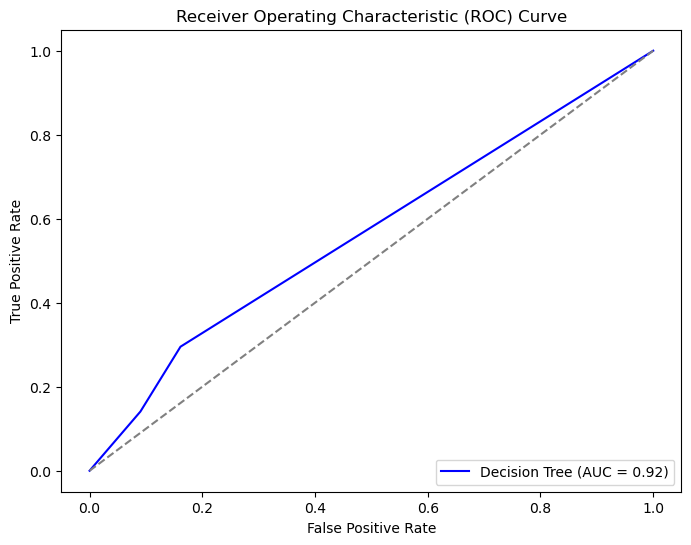

Optimized Decision Tree Performance:

Optimized Accuracy: 0.08173340647284695
Optimized Precision: 0.08173340647284695
Optimized Recall: 1.0
Optimized F1 Score: 0.1511156186612576
Optimized ROC AUC: 0.5650533625203468
Confusion Matrix:
 [[   0 1674]
 [   0  149]]


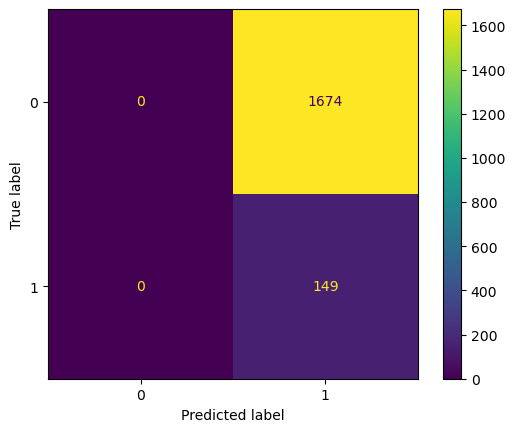

In [283]:
dt_stop_optimized = DecisionTreeClassifier(max_depth=15, 
                                      min_samples_split=2, 
                                      min_samples_leaf=1, 
                                      criterion='entropy',
                                      random_state=9,
                                      class_weight='balanced').fit(X_train_stops_scaled_df, 
                                                          y_train_stops)

# dt_stop_optimized = DecisionTreeClassifier(max_depth=5, 
#                                       min_samples_split=2, 
#                                       min_samples_leaf=1, 
#                                       criterion='entropy',
#                                       random_state=9,
#                                       class_weight='balanced').fit(X_train_stops_scaled_df, 
#                                                           y_train_stops)


# Evaluate the model
y_stop_probability_optimized = dt_stop_optimized.predict_proba(X_test_stops_enconded)[:, 1]

fpr_stop, tpr_stop, _ = roc_curve(y_test_stops, y_stop_probability_optimized)
roc_stop_auc = roc_auc_score(y_test_stops, y_stop_probability_optimized)


# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stop, tpr_stop, color='blue', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('./images/optimized_ROC_Curve.png')
plt.show()

# y_pred_optimized = dt_optimized.predict(X_test_encoded_df)
y_stop_pred_optimized = (y_stop_probability_optimized >= 0.4).astype(int)

print("Optimized Decision Tree Performance:\n")
print(f"Optimized Accuracy: {accuracy_score(y_test_stops, y_stop_pred_optimized)}")
print(f"Optimized Precision: {precision_score(y_test_stops, y_stop_pred_optimized)}")
print(f"Optimized Recall: {recall_score(y_test_stops, y_stop_pred_optimized)}")
print(f"Optimized F1 Score: {f1_score(y_test_stops, y_stop_pred_optimized)}")
print(f"Optimized ROC AUC: {roc_stop_auc}")


print(f"Confusion Matrix:\n {confusion_matrix(y_test_stops,y_stop_pred_optimized)}")

ConfusionMatrixDisplay.from_predictions(y_test_stops, y_stop_pred_optimized)

In [284]:
from imblearn.over_sampling import SMOTE
subset_count = pd.Series(y_train_stops).value_counts()
majority_count = subset_count[0]
minority_count = subset_count[1]

#double the minority class
target_minority_count = majority_count * 2

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy={0: majority_count, 1:target_minority_count})
# smote = SMOTE(random_state=33, sampling_strategy=0.5)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_stops_scaled_df, y_train_stops)

# Check the resampled class distribution
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())



Resampled class distribution: arrest_flag
1    13500
0     6750
Name: count, dtype: int64


In [285]:
print('Original Class Distribution:\n')
print(y.value_counts())

print('--------------------------------------------')
print('Synthetic Sample Class Distributions: \n')
print(pd.Series(y_train_resampled).value_counts())


Original Class Distribution:

Arrest Flag
0    54851
1     6704
Name: count, dtype: int64
--------------------------------------------
Synthetic Sample Class Distributions: 

arrest_flag
1    13500
0     6750
Name: count, dtype: int64


In [286]:
smote2 = SMOTE(random_state=33)

X_train_resample2, y_train_resample2 = smote2.fit_resample(X_train_stops_scaled, y_train_stops)

print("Resampled class distribution:", pd.Series(y_train_resample2).value_counts())

Resampled class distribution: arrest_flag
0    6750
1    6750
Name: count, dtype: int64


Precision Score: 10.17%
Recall: 44.30%
F1-Score: 16.54%
[[1091  583]
 [  83   66]]


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


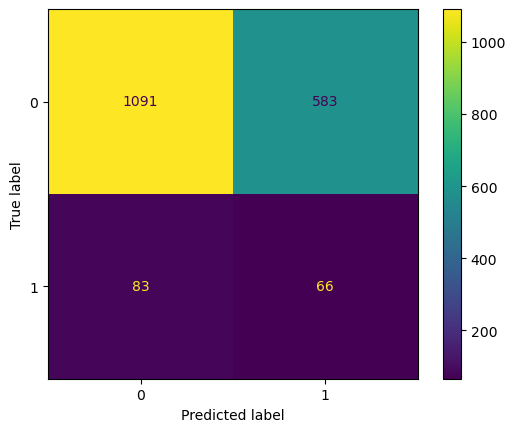

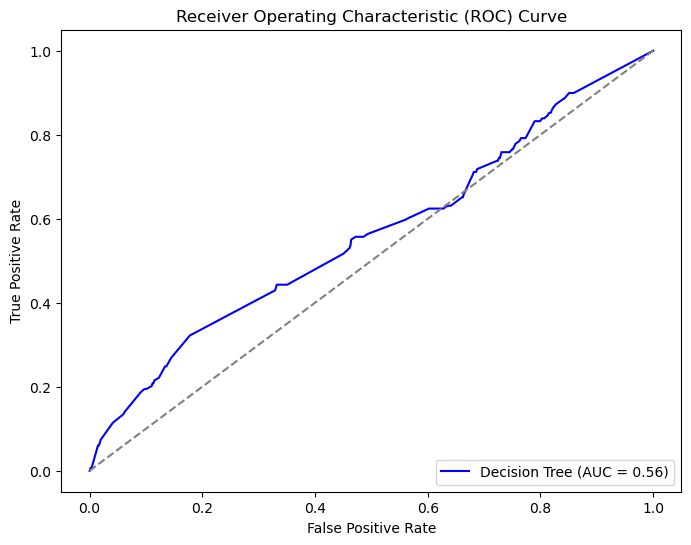

In [287]:
dt_resampled = DecisionTreeClassifier(random_state=33, criterion='gini', class_weight='balanced').fit(X_train_resampled, y_train_resampled)

y_pred_resampled = dt_resampled.predict(X_test_stops_scaled_df)

resampled_accuracy = accuracy_score(y_test_stops, y_pred_resampled)
resampled_precision = precision_score(y_test_stops, y_pred_resampled)
resample_recall = recall_score(y_test_stops, y_pred_resampled)
resample_f1 = f1_score(y_test_stops, y_pred_resampled)

print(f"Precision Score: {resampled_precision * 100:.2f}%")
print(f"Recall: {resample_recall * 100:.2f}%")
print(f"F1-Score: {resample_f1 * 100:.2f}%")
print(confusion_matrix(y_test_stops, y_pred_resampled))

ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_resampled)


# Evaluate the model
y_stop_resampled_probability = dt_resampled.predict_proba(X_test_stops_scaled)[:, 1]

fpr_resampled, tpr_resampled, _ = roc_curve(y_test_stops, y_stop_resampled_probability)
roc_resampled_auc = roc_auc_score(y_test_stops, y_stop_resampled_probability)
precision, recall, _ = precision_recall_curve(y_test_stops, y_pred_resampled)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled, tpr_resampled, color='blue', label=f'Decision Tree (AUC = {roc_resampled_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# plt.savefig('./images/optimized_ROC_Curve.png')
plt.show()


After tackling the imbalance issue, we can that the model is correctly identifying 875 of actual True Postive cases, Arrests. 

But, precision is low at 37%, meaning that its only correct 37% of the time. The model is making false positive predicitons.

Prediciting cases where the individual is arrested but shouldn't be arrested

Accuracy: 79.43%
Precision Score: 14.01%
Recall: 29.53%
F1-Score: 19.01%
[[1404  270]
 [ 105   44]]


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\omend\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


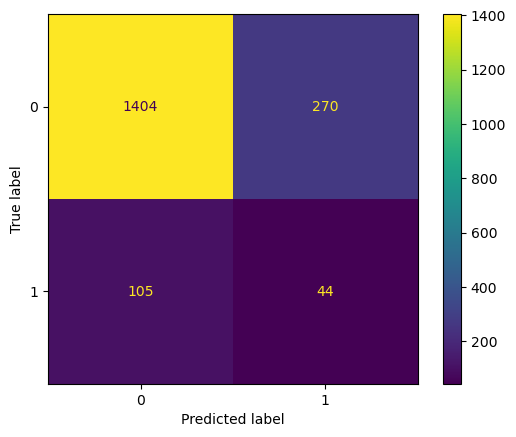

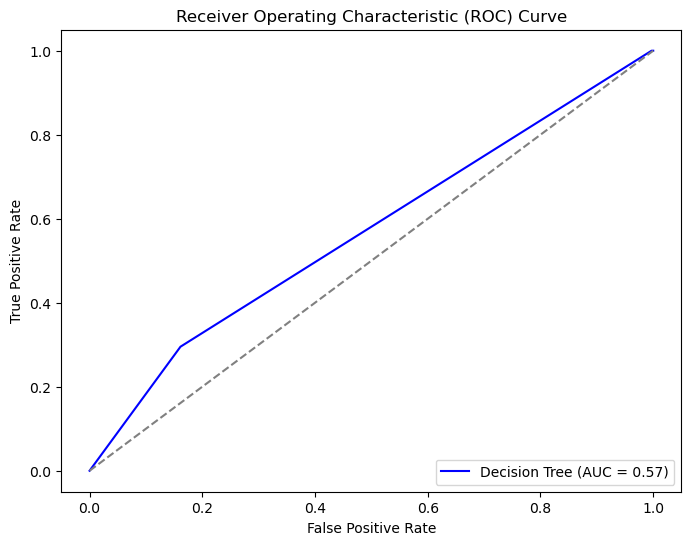

In [162]:
dt_resampled2 = DecisionTreeClassifier(random_state=33, criterion='entropy',max_depth=5, class_weight='balanced').fit(X_train_resample2, y_train_resample2)

y_pred_resampled2 = dt_resampled2.predict(X_test_stops_scaled_df)

resampled_accuracy2 = accuracy_score(y_test_stops, y_pred_resampled2)
resampled_precision2 = precision_score(y_test_stops, y_pred_resampled2)
resample_recall2 = recall_score(y_test_stops, y_pred_resampled2)
resample_f12 = f1_score(y_test_stops, y_pred_resampled2)

print(f"Accuracy: {resampled_accuracy2 * 100:.2f}%")
print(f"Precision Score: {resampled_precision2 * 100:.2f}%")
print(f"Recall: {resample_recall2 * 100:.2f}%")
print(f"F1-Score: {resample_f12 * 100:.2f}%")
print(confusion_matrix(y_test_stops, y_pred_resampled2))

ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_resampled2)


# Evaluate the model
y_stop_resampled_probability2 = dt_resampled2.predict_proba(X_test_stops_scaled_df)[:, 1]

fpr_resampled2, tpr_resampled2, _ = roc_curve(y_test_stops, y_stop_resampled_probability)
roc_resampled_auc2 = roc_auc_score(y_test_stops, y_stop_resampled_probability)
# precision, recall, _ = precision_recall_curve(y_test_stops, y_pred_resampled)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled2, tpr_resampled2, color='blue', label=f'Decision Tree (AUC = {roc_resampled_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# plt.savefig('./images/optimized_ROC_Curve.png')
plt.show()

SMOTE optimized Decistion Tree: 

Accuracy: 79.43%
Precision Score: 14.01%
Recall: 29.53%
F1-Score:19.01%

Confusion Matrix (SMOTE)
[[1404  270]
 [ 105   44]]
Smote Optimized ROC AUC: 0.5680582617690217


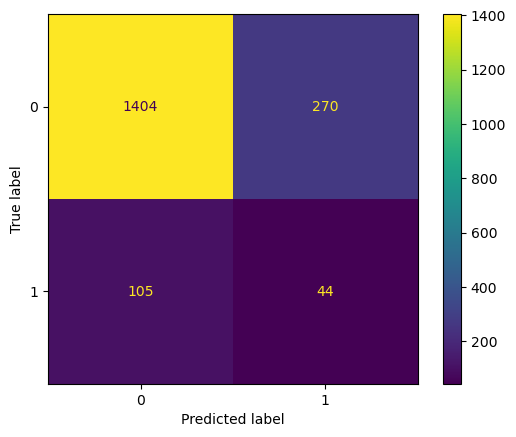

In [163]:
dt_optimized_smote = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',
    class_weight='balanced',
    random_state=33
).fit(X_train_resampled, y_train_resampled)

y_prob_smote = dt_optimized_smote.predict_proba(X_test_stops_scaled_df)[:,1]
smote_roc_auc_score = roc_auc_score(y_test_stops, y_prob_smote)

y_pred_smote = (y_prob_smote >= 0.5).astype(int)
print('SMOTE optimized Decistion Tree: \n')
print(f"Accuracy: {accuracy_score(y_test_stops, y_pred_smote) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test_stops, y_pred_smote) * 100:.2f}%")
print(f"Recall: {recall_score(y_test_stops, y_pred_smote) * 100:.2f}%")
print(f"F1-Score:{f1_score(y_test_stops, y_pred_smote)* 100:.2f}%\n")

print('Confusion Matrix (SMOTE)')
cm = confusion_matrix(y_test_stops, y_pred_smote)
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test_stops, y_pred_smote)
print(f'Smote Optimized ROC AUC: {smote_roc_auc_score}')

## Next Steps


Based on the model's performance, the following steps are recommended:

Conduct fairness evaluations to identify and address potential biases.
Adjust the decision threshold for precision or recall optimization based on use-case priorities.
Test the model in a real-world pilot program to validate its effectiveness and identify areas for improvement.

## Conclusion

The model demonstrates excellent performance, achieving high accuracy (96.25%) and a strong ROC AUC score (98.48%). These results suggest it has strong potential for deployment in predicting arrests from Terry stops. However, ethical considerations and fairness analyses are crucial to ensure its responsible and unbiased use.